<a href="https://colab.research.google.com/github/nprimavera/Financial-Models/blob/main/Model_to_Calculate_Stock_Returns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Code to calculate stock returns

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def calculate_returns(df, current_price):
    return_periods = {
        "1 Week": 7,
        "1 Month": 30,
        "3 Months": 90,
        "6 Months": 180,
        "1 Year": 365,
        "5 Years": 5 * 365,
    }

    print("\nReturns:")
    for label, days in return_periods.items():
        past_date = df.index.max() - timedelta(days=days)
        past_data = df[df.index <= past_date]
        if not past_data.empty:
            #past_price = past_data['Close'].iloc[-1]
            past_price = float(past_data['Close'].iloc[-1])
            ret = (current_price - past_price) / past_price * 100
            print(f"{label} Return: {ret:.2f}%")
        else:
            print(f"{label} Return: Not enough data.")

def plot_sma(df, ticker):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Close'], label='Close Price', alpha=0.5)
    plt.plot(df.index, df['SMA_50'], label='50-Day SMA', linewidth=2)
    plt.plot(df.index, df['SMA_200'], label='200-Day SMA', linewidth=2)
    plt.title(f"{ticker} - 50-Day vs 200-Day SMA")
    plt.xlabel("Date (year)")
    plt.ylabel("Price ($)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def analyze_stock(ticker):
    print(f"Analyzing: {ticker}\n")
    end = datetime.today()
    start = end - timedelta(days=5*365 + 200)  # buffer for 5 years + SMA
    df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))

    if df.empty:
        print("No data found.")
        return

    #current_price = df['Close'].iloc[-1]
    current_price = float(df['Close'].iloc[-1])
    print(f"\n\nCurrent Price: ${current_price:.2f}")

    calculate_returns(df, current_price)
    plot_sma(df, ticker)

Analyzing: QQQ



<ipython-input-1-1054520425>:50: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
<ipython-input-1-1054520425>:57: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])
<ipython-input-1-1054520425>:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])




Current Price: $534.29

Returns:
1 Week Return: 0.68%
1 Month Return: 2.45%
3 Months Return: 12.76%
6 Months Return: 3.77%
1 Year Return: 12.18%
5 Years Return: 125.99%


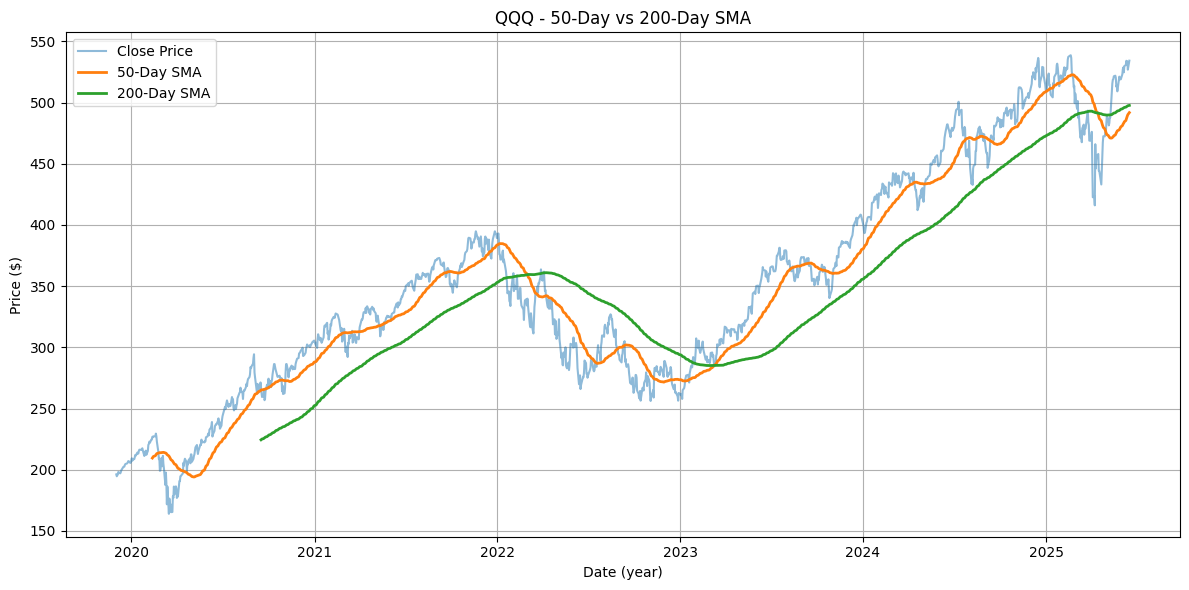

Analyzing: VOO



<ipython-input-1-1054520425>:50: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Current Price: $554.07

Returns:
1 Week Return: 0.51%
1 Month Return: 1.43%
3 Months Return: 7.77%
6 Months Return: 3.46%
1 Year Return: 12.53%
5 Years Return: 108.83%



<ipython-input-1-1054520425>:57: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])
<ipython-input-1-1054520425>:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])


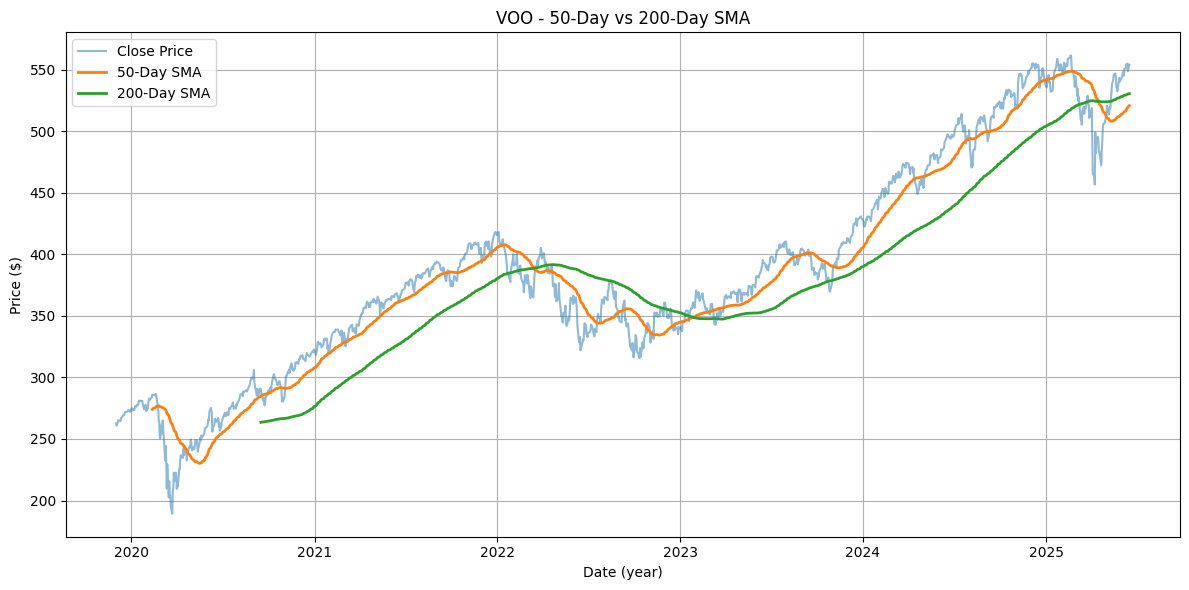

<ipython-input-1-1054520425>:50: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))


Analyzing: DIA



[*********************100%***********************]  1 of 1 completed
<ipython-input-1-1054520425>:57: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])
<ipython-input-1-1054520425>:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])




Current Price: $426.28

Returns:
1 Week Return: -0.49%
1 Month Return: -0.06%
3 Months Return: 2.67%
6 Months Return: 1.28%
1 Year Return: 11.68%
5 Years Return: 77.75%


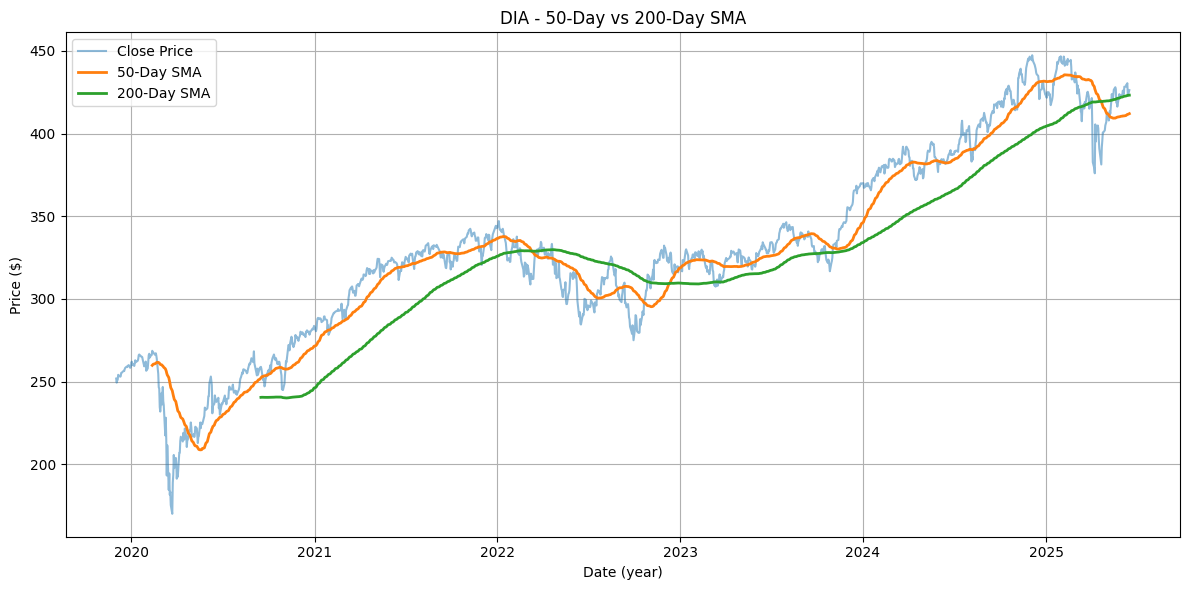

Analyzing: BRK-B



<ipython-input-1-1054520425>:50: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
<ipython-input-1-1054520425>:57: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])
<ipython-input-1-1054520425>:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])




Current Price: $490.23

Returns:
1 Week Return: -0.63%
1 Month Return: -4.68%
3 Months Return: -6.29%
6 Months Return: 9.77%
1 Year Return: 20.88%
5 Years Return: 171.05%


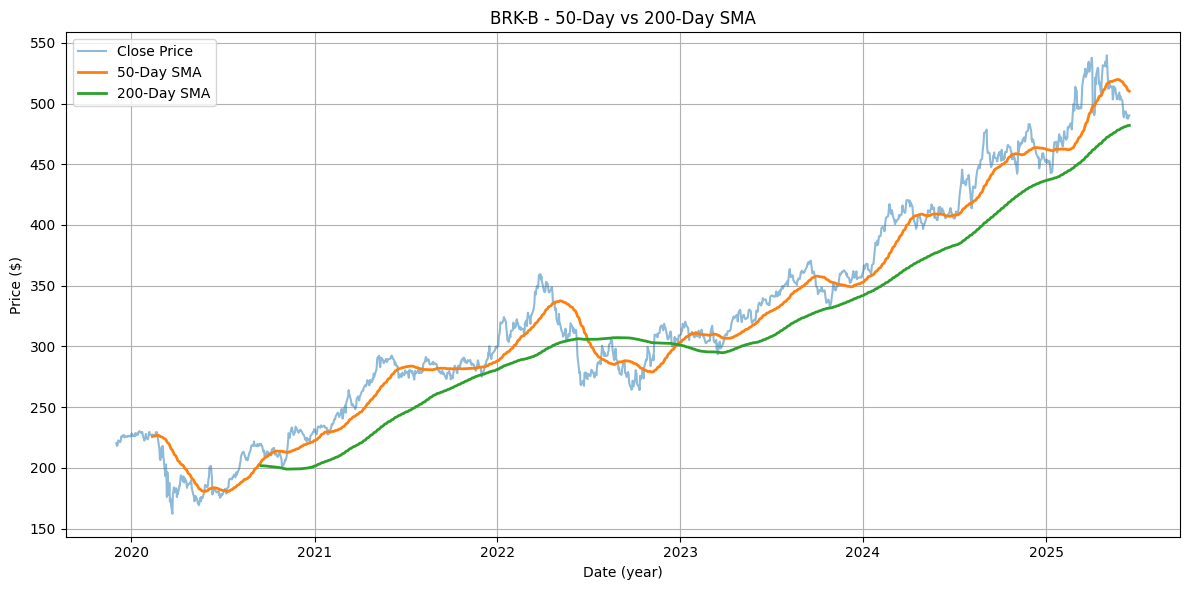

Analyzing: TQQQ



<ipython-input-1-1054520425>:50: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
<ipython-input-1-1054520425>:57: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])
<ipython-input-1-1054520425>:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])




Current Price: $75.80

Returns:
1 Week Return: 1.69%
1 Month Return: 6.09%
3 Months Return: 26.90%
6 Months Return: -7.08%
1 Year Return: 3.57%
5 Years Return: 237.77%


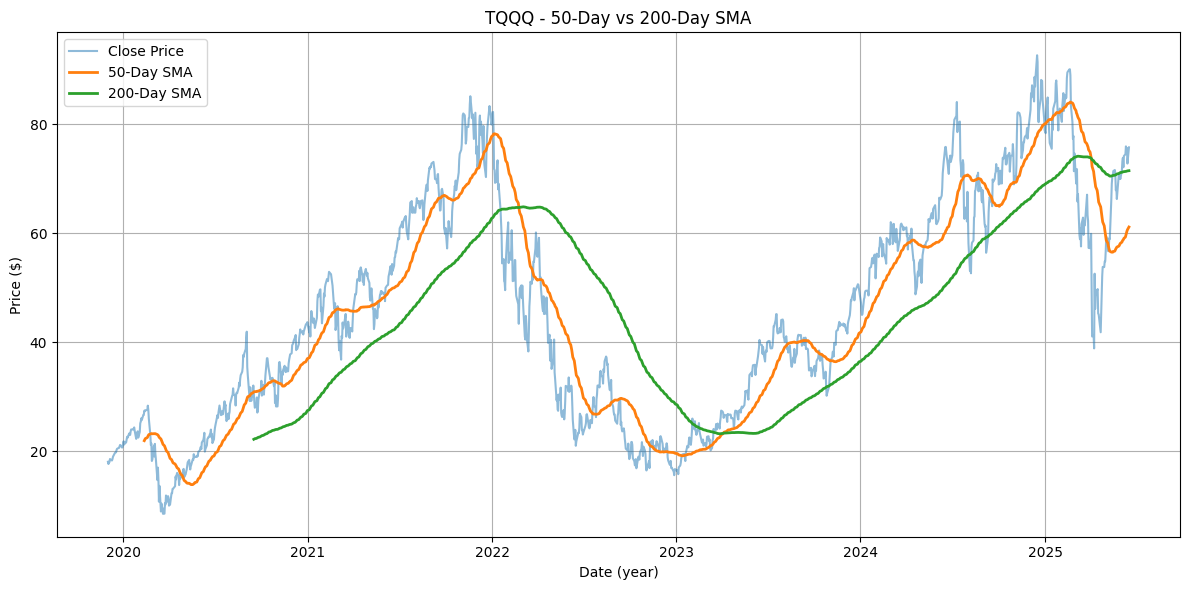

Analyzing: AMZN



<ipython-input-1-1054520425>:50: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
<ipython-input-1-1054520425>:57: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])
<ipython-input-1-1054520425>:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])




Current Price: $216.10

Returns:
1 Week Return: -0.41%
1 Month Return: 5.11%
3 Months Return: 12.07%
6 Months Return: -2.00%
1 Year Return: 17.66%
5 Years Return: 63.65%


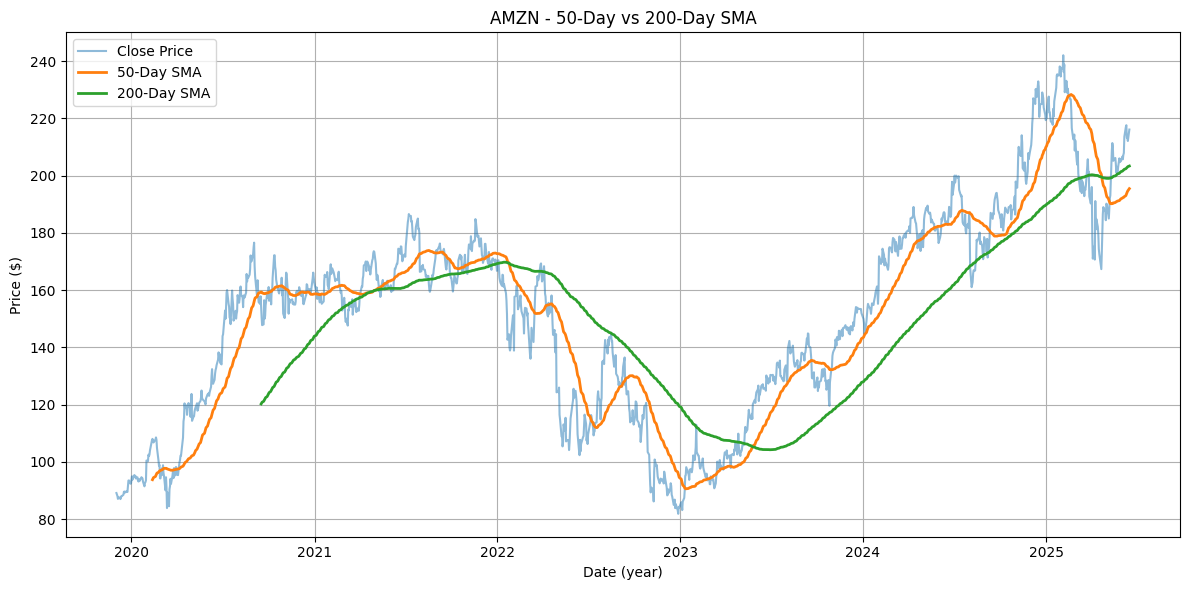

Analyzing: TSLA



<ipython-input-1-1054520425>:50: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
<ipython-input-1-1054520425>:57: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])
<ipython-input-1-1054520425>:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])




Current Price: $329.13

Returns:
1 Week Return: 6.66%
1 Month Return: -5.96%
3 Months Return: 46.08%
6 Months Return: -25.22%
1 Year Return: 84.89%
5 Years Return: 397.78%


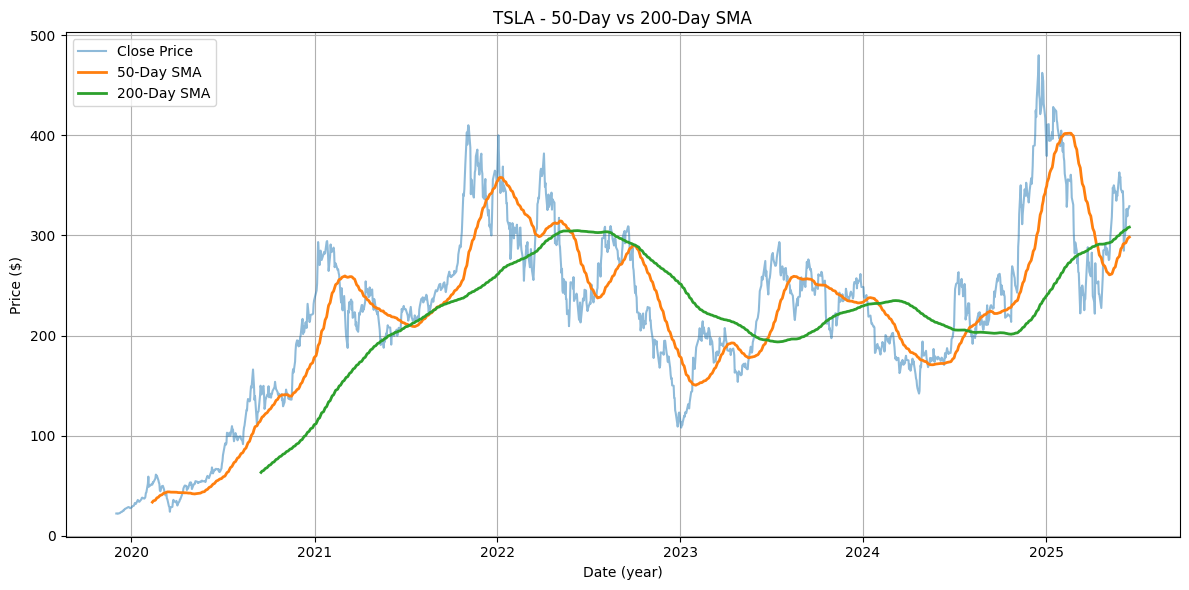

Analyzing: VTI



<ipython-input-1-1054520425>:50: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
<ipython-input-1-1054520425>:57: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])
<ipython-input-1-1054520425>:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])




Current Price: $296.47

Returns:
1 Week Return: 0.38%
1 Month Return: 1.33%
3 Months Return: 7.69%
6 Months Return: 2.78%
1 Year Return: 12.66%
5 Years Return: 102.37%


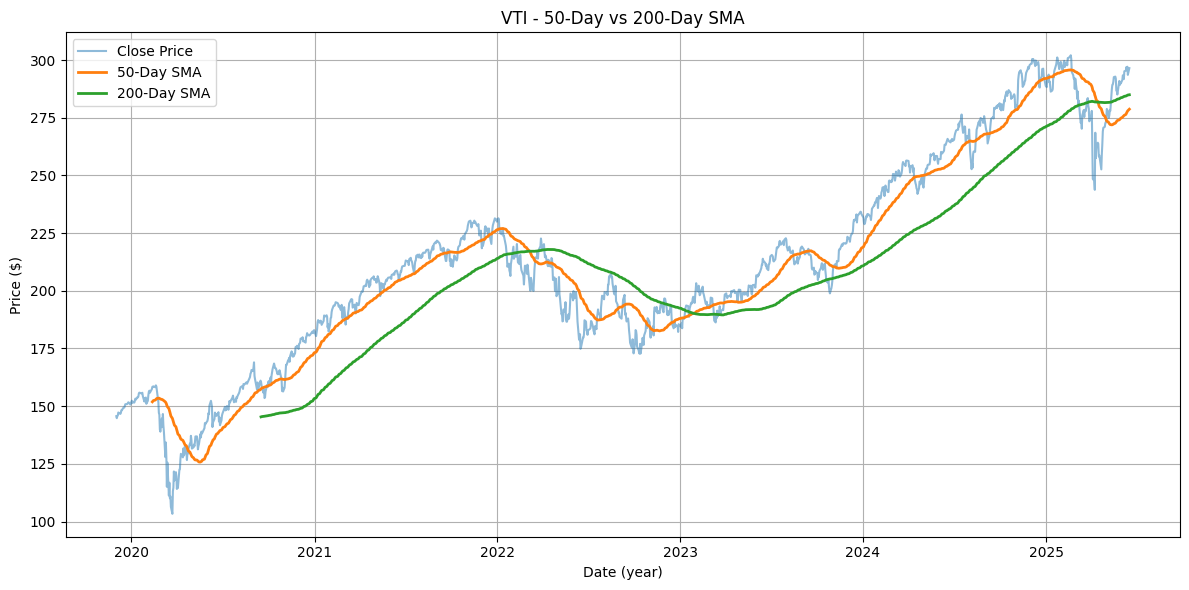

Analyzing: NVDA



<ipython-input-1-1054520425>:50: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Current Price: $144.69

Returns:
1 Week Return: 1.45%
1 Month Return: 6.87%
3 Months Return: 25.36%
6 Months Return: 12.26%
1 Year Return: 9.75%
5 Years Return: 1471.75%



<ipython-input-1-1054520425>:57: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])
<ipython-input-1-1054520425>:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])


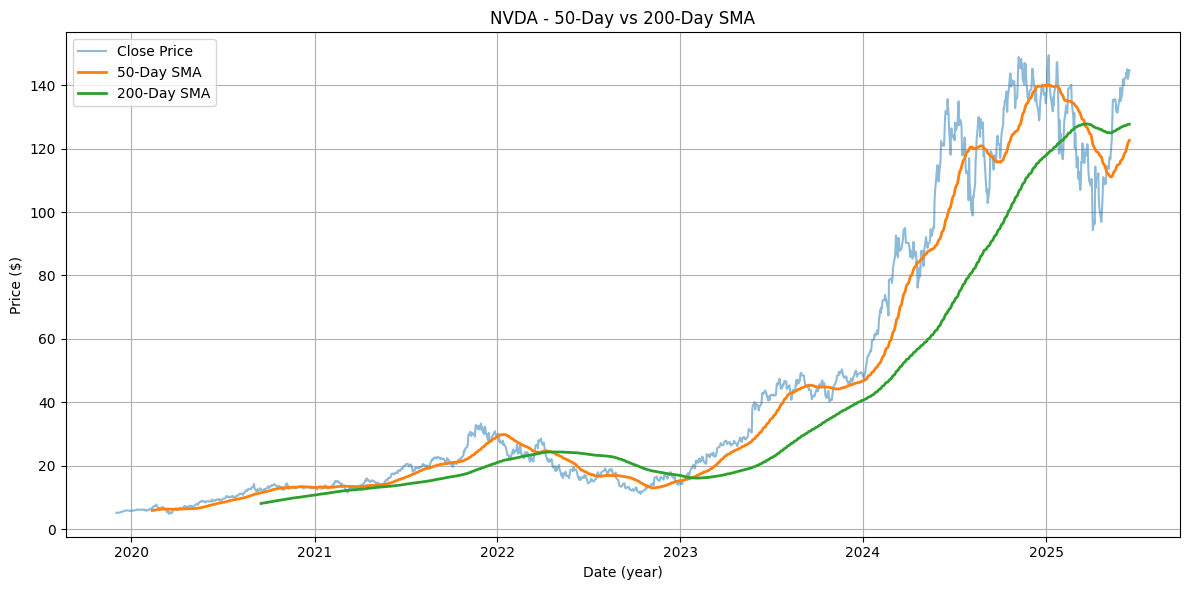

<ipython-input-1-1054520425>:50: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))


Analyzing: GOOG



[*********************100%***********************]  1 of 1 completed
<ipython-input-1-1054520425>:57: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])
<ipython-input-1-1054520425>:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])




Current Price: $177.94

Returns:
1 Week Return: 0.17%
1 Month Return: 6.40%
3 Months Return: 9.52%
6 Months Return: -6.20%
1 Year Return: 0.24%
5 Years Return: 146.70%


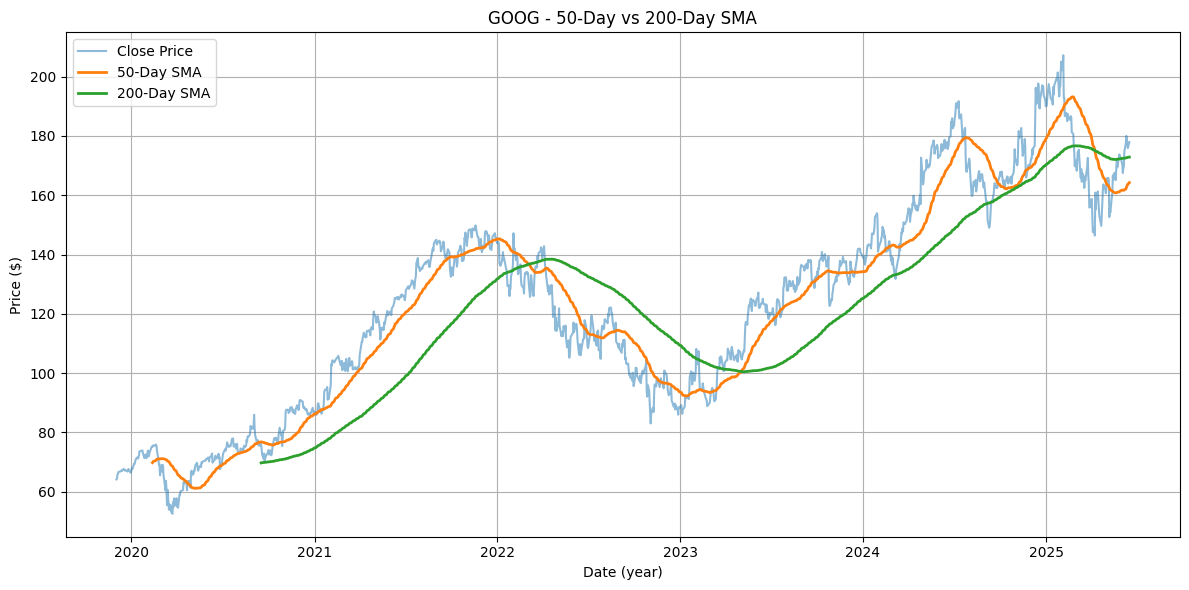

Analyzing: AAPL



<ipython-input-1-1054520425>:50: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
<ipython-input-1-1054520425>:57: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])
<ipython-input-1-1054520425>:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])




Current Price: $198.42

Returns:
1 Week Return: -1.50%
1 Month Return: -6.08%
3 Months Return: -6.59%
6 Months Return: -19.82%
1 Year Return: -6.18%
5 Years Return: 132.23%


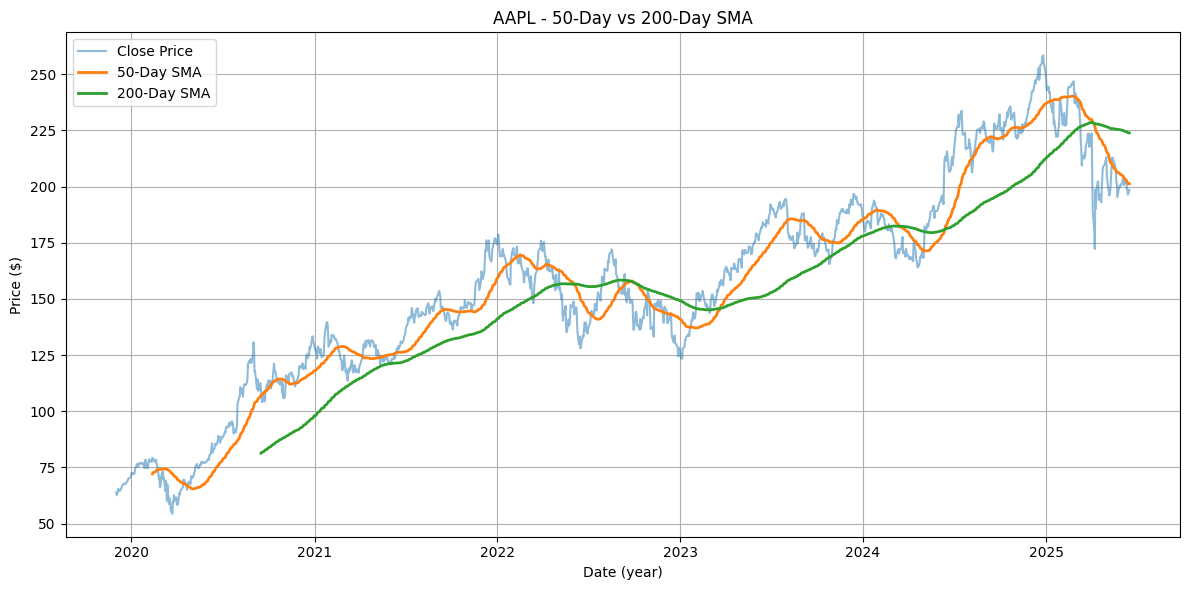

Analyzing: QBIG



<ipython-input-1-1054520425>:50: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
<ipython-input-1-1054520425>:57: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])
<ipython-input-1-1054520425>:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])




Current Price: $31.34

Returns:
1 Week Return: 1.03%
1 Month Return: 3.82%
3 Months Return: 16.91%
6 Months Return: -1.63%
1 Year Return: Not enough data.
5 Years Return: Not enough data.


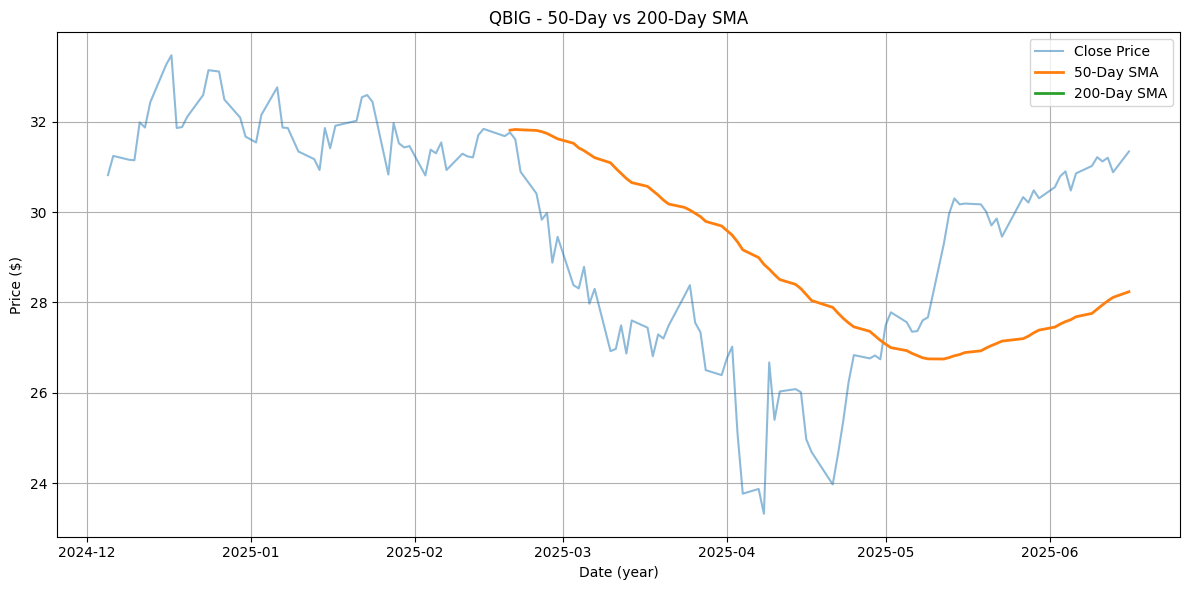

Analyzing: VB



<ipython-input-1-1054520425>:50: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
<ipython-input-1-1054520425>:57: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])
<ipython-input-1-1054520425>:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])




Current Price: $232.36

Returns:
1 Week Return: -0.58%
1 Month Return: -1.01%
3 Months Return: 3.79%
6 Months Return: -2.81%
1 Year Return: 9.15%
5 Years Return: 70.44%


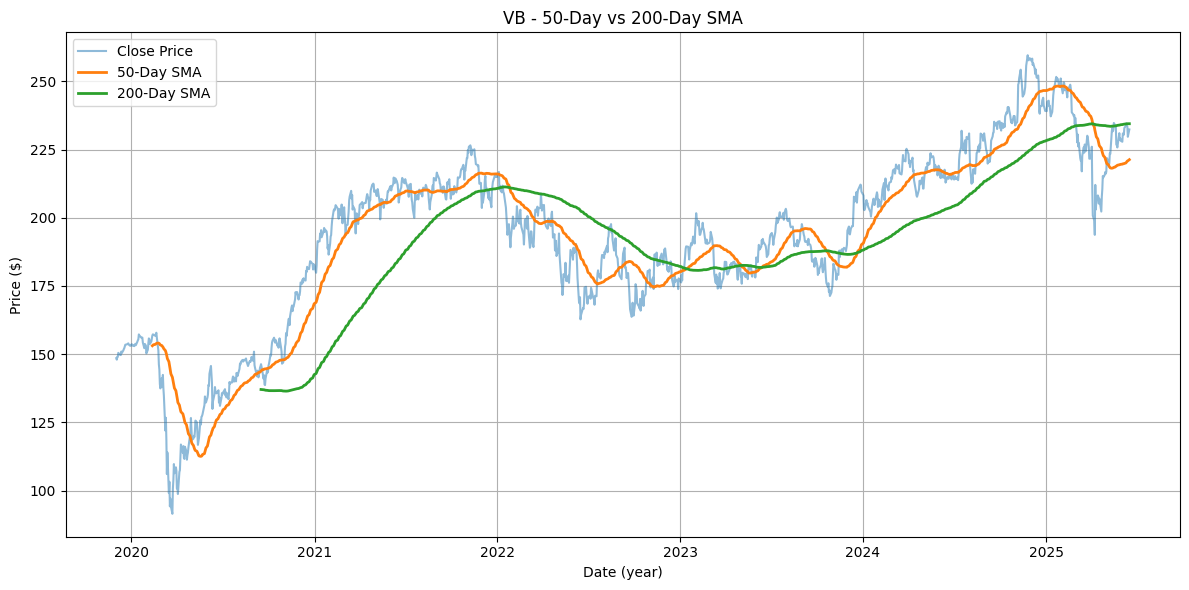

Analyzing: META



<ipython-input-1-1054520425>:50: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
<ipython-input-1-1054520425>:57: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])
<ipython-input-1-1054520425>:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])




Current Price: $702.12

Returns:
1 Week Return: 1.24%
1 Month Return: 9.73%
3 Months Return: 20.66%
6 Months Return: 17.77%
1 Year Return: 39.74%
5 Years Return: 199.74%


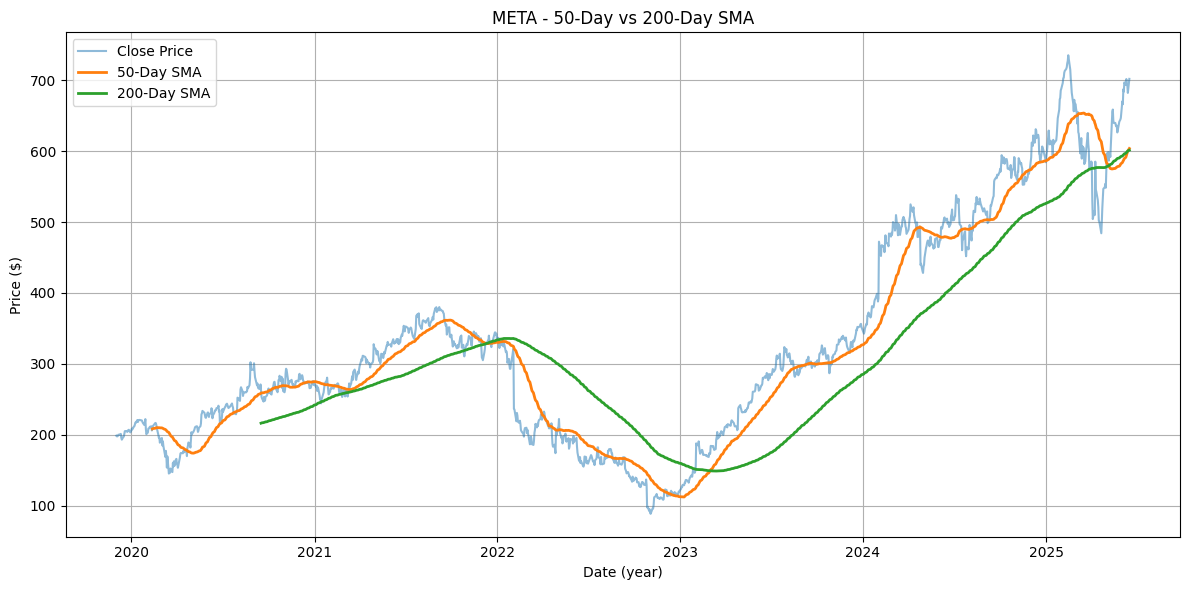

Analyzing: MSFT



<ipython-input-1-1054520425>:50: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
<ipython-input-1-1054520425>:57: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])
<ipython-input-1-1054520425>:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])




Current Price: $479.14

Returns:
1 Week Return: 1.35%
1 Month Return: 5.47%
3 Months Return: 25.16%
6 Months Return: 9.97%
1 Year Return: 9.09%
5 Years Return: 157.47%


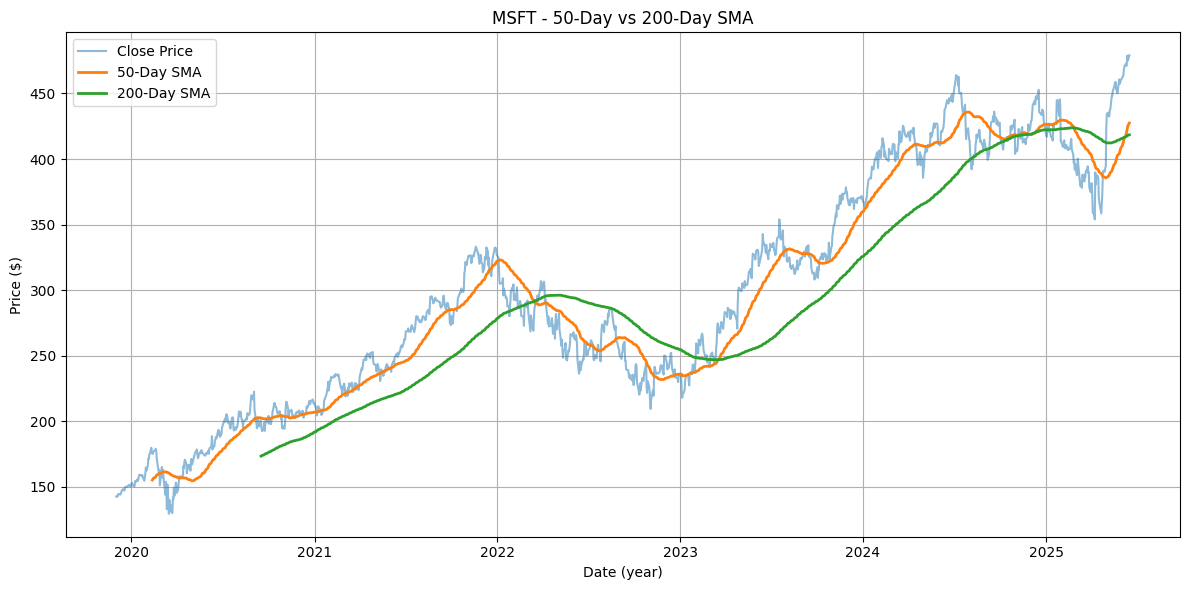

Analyzing: GS



<ipython-input-1-1054520425>:50: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
<ipython-input-1-1054520425>:57: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])
<ipython-input-1-1054520425>:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])




Current Price: $627.85

Returns:
1 Week Return: 2.34%
1 Month Return: 1.93%
3 Months Return: 14.35%
6 Months Return: 15.24%
1 Year Return: 43.58%
5 Years Return: 243.31%


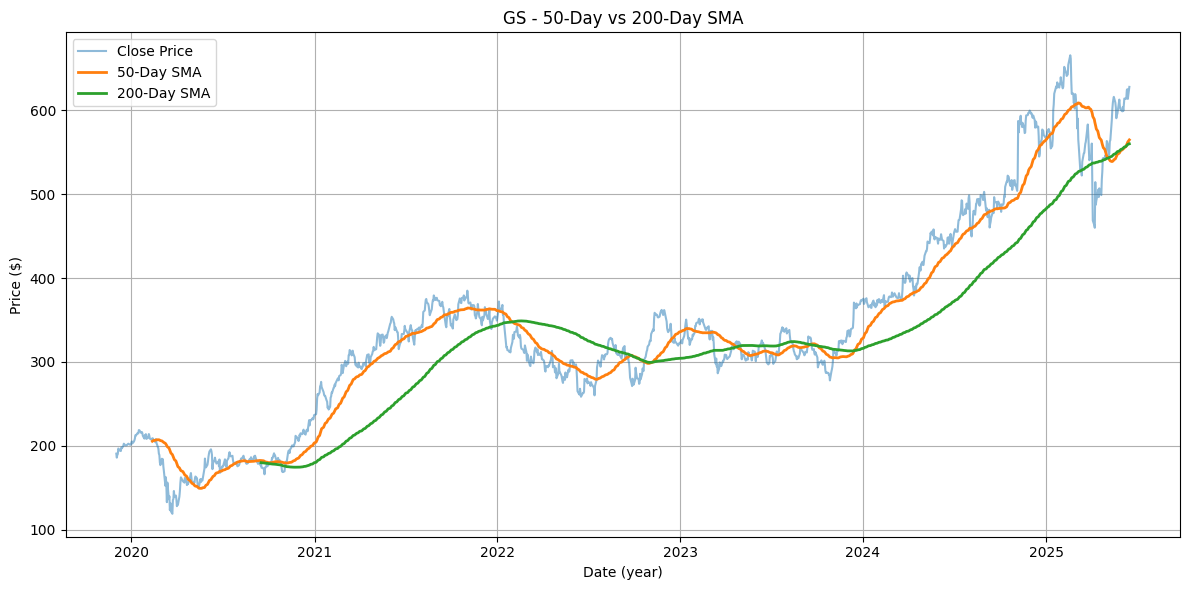

Analyzing: BLK



<ipython-input-1-1054520425>:50: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
<ipython-input-1-1054520425>:57: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])
<ipython-input-1-1054520425>:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])




Current Price: $982.10

Returns:
1 Week Return: -0.68%
1 Month Return: -0.24%
3 Months Return: 2.99%
6 Months Return: -2.71%
1 Year Return: 30.44%
5 Years Return: 99.72%


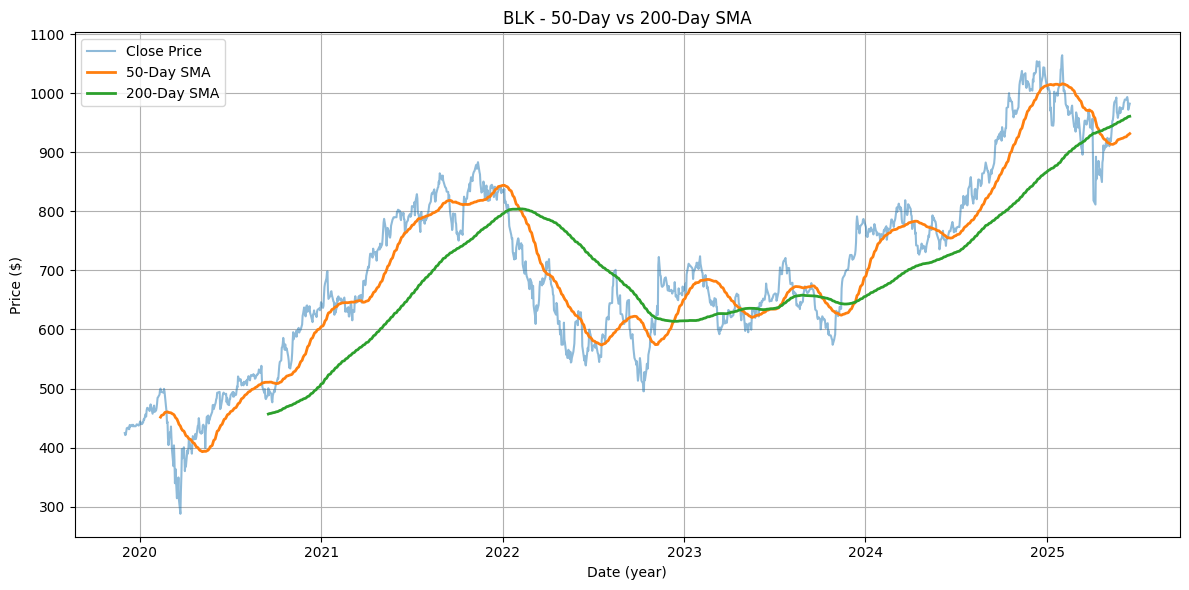

Analyzing: JPM



<ipython-input-1-1054520425>:50: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
<ipython-input-1-1054520425>:57: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_price = float(df['Close'].iloc[-1])
<ipython-input-1-1054520425>:24: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  past_price = float(past_data['Close'].iloc[-1])




Current Price: $270.36

Returns:
1 Week Return: 1.36%
1 Month Return: 1.05%
3 Months Return: 15.77%
6 Months Return: 18.69%
1 Year Return: 42.75%
5 Years Return: 212.32%


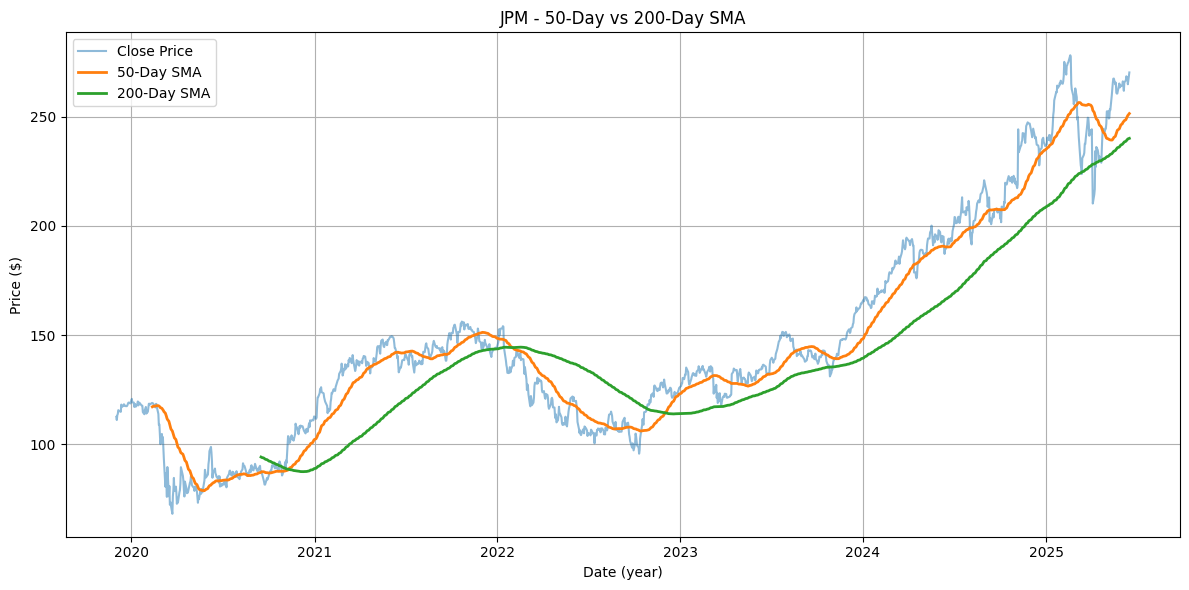

In [2]:
# === INPUT YOUR STOCK TICKERS HERE ===
tickers = ['QQQ', 'VOO', 'DIA', 'BRK-B', 'TQQQ', 'AMZN', 'TSLA', 'VTI', 'NVDA', 'GOOG', 'AAPL', 'QBIG', 'VB', 'META', 'MSFT', 'GS', 'BLK', 'JPM']  # ← Add or remove tickers here

for ticker in tickers:
    analyze_stock(ticker)

In [3]:
# A simple backtest model using Golden Cross & Death Cross signals

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

print("A simple backtest model using Golden Cross & Death Cross signals.")
print("\nSimulate entering/exiting positions based on crossover signals.")
print("\nComparing the backtest model vs the buy and hold method.")
print("\nModel is based off investing $10,000 in each stock.")

# Download stock data
def get_data(ticker):
    end = datetime.today()
    start = end - timedelta(days=5*365 + 30)
    df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
    return df

# Generate SMA signals
def generate_signals(df):
    df['SMA_50'] = df['Close'].rolling(window=50).mean()    # 50 day Simple Moving Average
    df['SMA_200'] = df['Close'].rolling(window=200).mean()  # 200 day Simple Moving Average
    df.dropna(inplace=True)

    # Trading signals: 1 = long, 0 = cash
    df['Signal'] = 0 # Exit position (go to cash) when Death Cross occurs
    df.loc[df['SMA_50'] > df['SMA_200'], 'Signal'] = 1 # Enter long position when Golden Cross occurs
    df['Position'] = df['Signal'].shift(1)  # Shift to avoid look-ahead bias
    df.dropna(inplace=True)
    return df

# Backtest performance
def backtest(df, initial_capital=10000):
    df['Daily Return'] = df['Close'].pct_change()
    df['Strategy Return'] = df['Position'] * df['Daily Return']

    df['Portfolio Value'] = (1 + df['Strategy Return']).cumprod() * initial_capital
    df['Buy & Hold'] = (1 + df['Daily Return']).cumprod() * initial_capital

    total_return = df['Portfolio Value'].iloc[-1] - initial_capital
    bh_return = df['Buy & Hold'].iloc[-1] - initial_capital

    print(f"\nBacktest Results:")
    print(f"Strategy Total Return: ${total_return:,.2f}")
    print(f"Buy & Hold Return: ${bh_return:,.2f}")

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Portfolio Value'], label='Strategy', linewidth=2)
    plt.plot(df.index, df['Buy & Hold'], label='Buy & Hold', linestyle='--')
    plt.title("Strategy vs Buy & Hold")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# Full analysis pipeline
def run_quant_model(ticker):
    print(f"\nRunning backtest for {ticker}\n")
    df = get_data(ticker)
    if df.empty:
        print("No data found.")
        return
    df = generate_signals(df)
    if df.empty:
        print("Not enough data after generating signals.")
        return
    backtest(df)

A simple backtest model using Golden Cross & Death Cross signals.

Simulate entering/exiting positions based on crossover signals.

Comparing the backtest model vs the buy and hold method.

Model is based off investing $10,000 in each stock.


<ipython-input-3-4280806903>:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


Running backtest for QQQ




Backtest Results:
Strategy Total Return: $8,177.96
Buy & Hold Return: $7,772.78


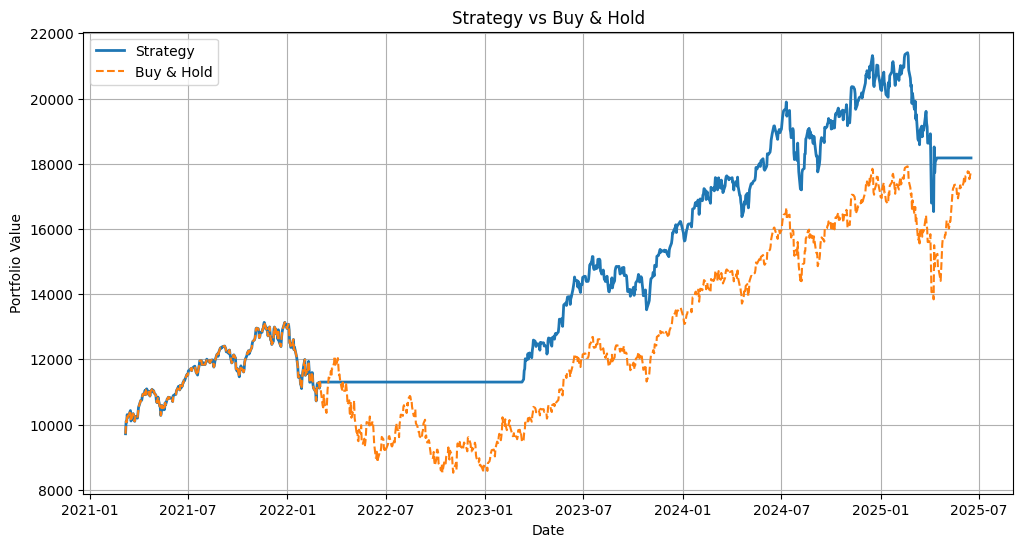


Running backtest for VOO



<ipython-input-3-4280806903>:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


Backtest Results:
Strategy Total Return: $5,458.61
Buy & Hold Return: $6,730.40


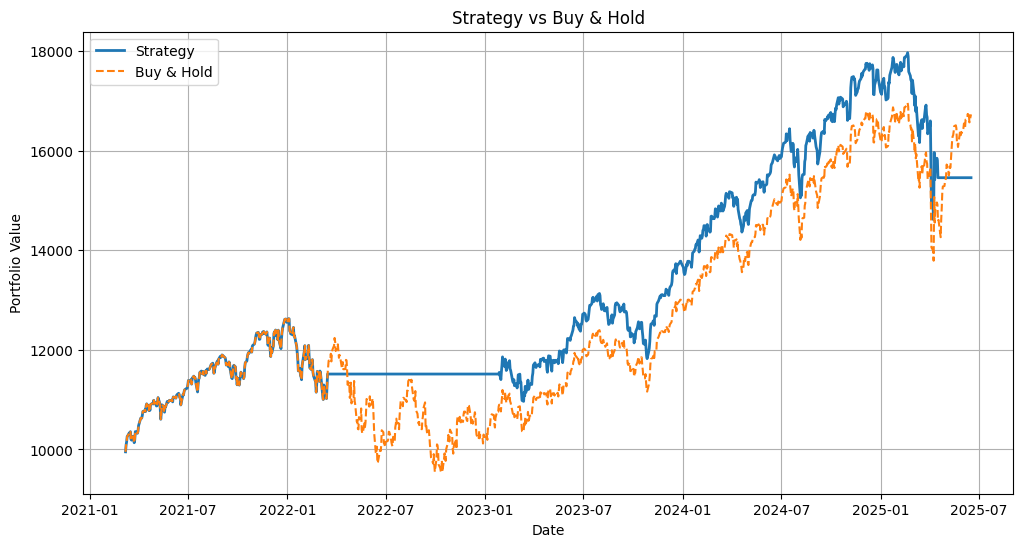

<ipython-input-3-4280806903>:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))



Running backtest for DIA



[*********************100%***********************]  1 of 1 completed


Backtest Results:
Strategy Total Return: $2,749.96
Buy & Hold Return: $4,541.30


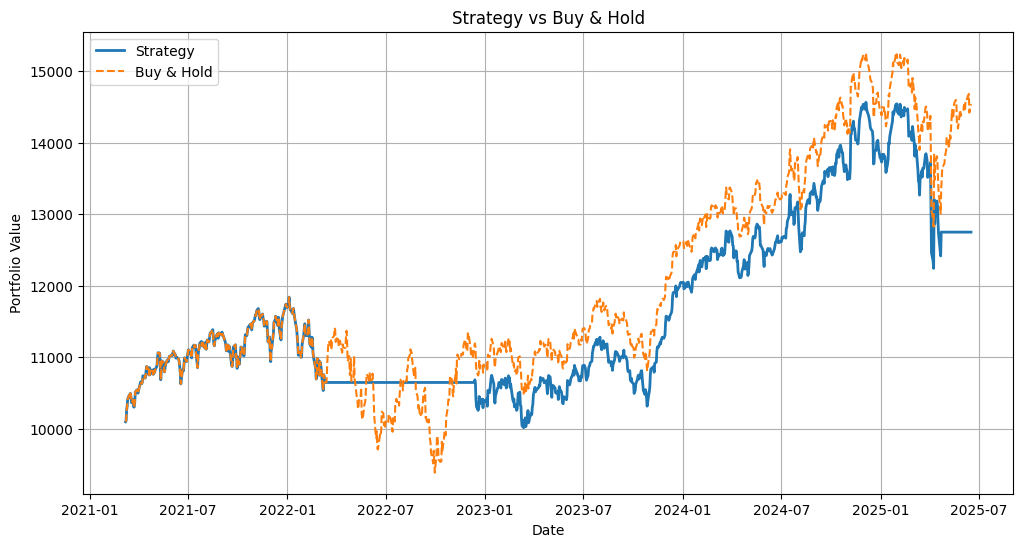

<ipython-input-3-4280806903>:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))



Running backtest for BRK-B



[*********************100%***********************]  1 of 1 completed



Backtest Results:
Strategy Total Return: $7,424.40
Buy & Hold Return: $9,365.20


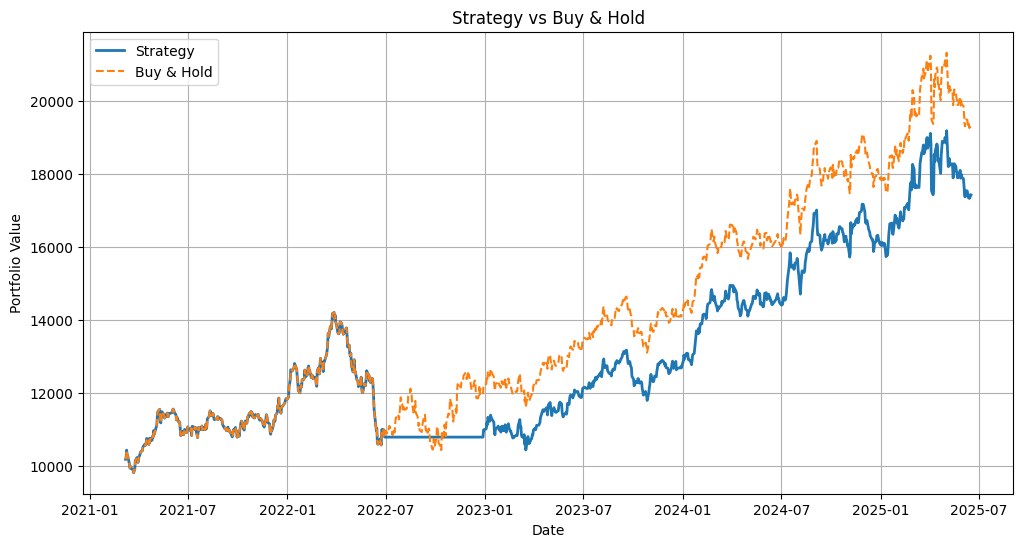


Running backtest for TQQQ



<ipython-input-3-4280806903>:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Backtest Results:
Strategy Total Return: $12,763.61
Buy & Hold Return: $8,818.05


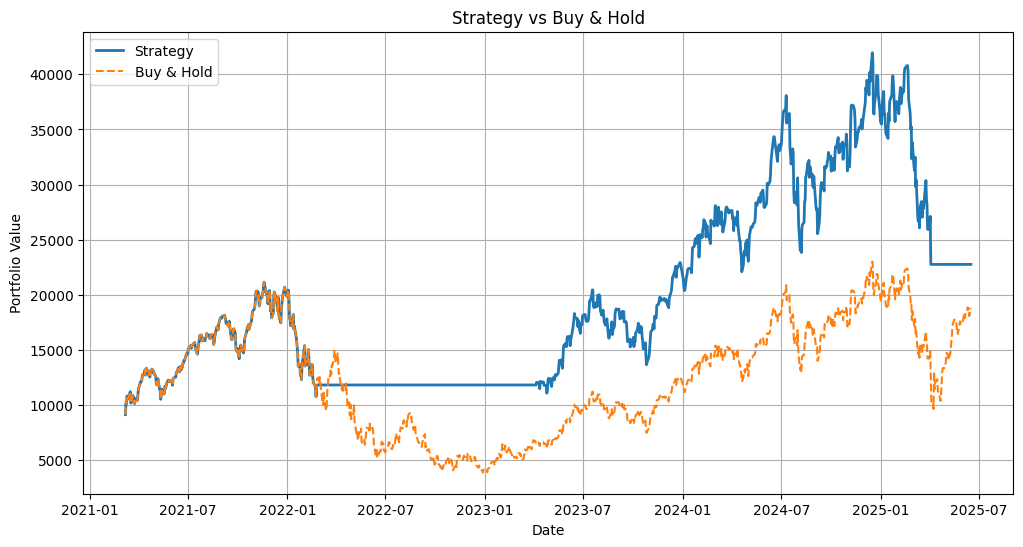


Running backtest for AMZN



<ipython-input-3-4280806903>:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


Backtest Results:
Strategy Total Return: $3,068.95
Buy & Hold Return: $4,404.46


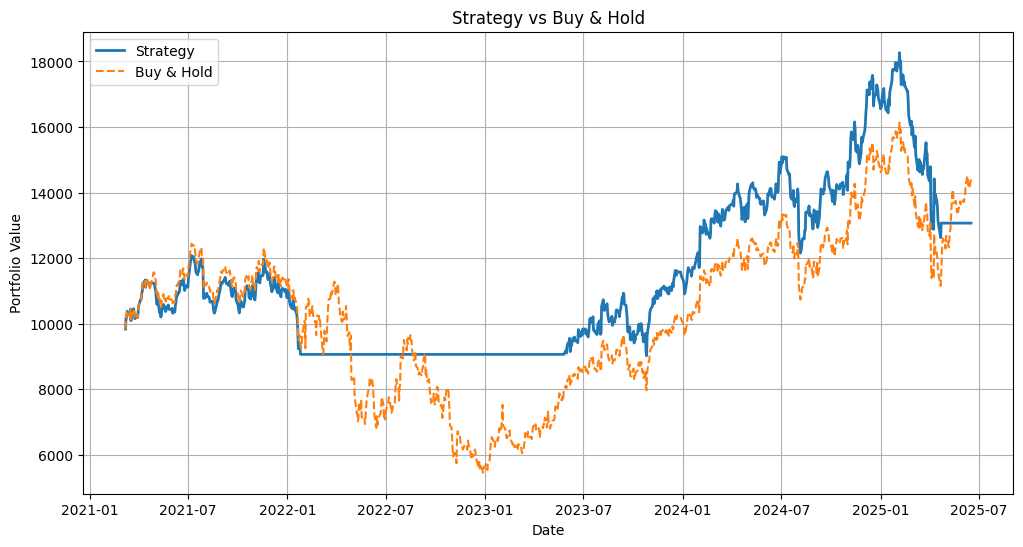

<ipython-input-3-4280806903>:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))



Running backtest for TSLA



[*********************100%***********************]  1 of 1 completed


Backtest Results:
Strategy Total Return: $-1,487.00
Buy & Hold Return: $6,512.92


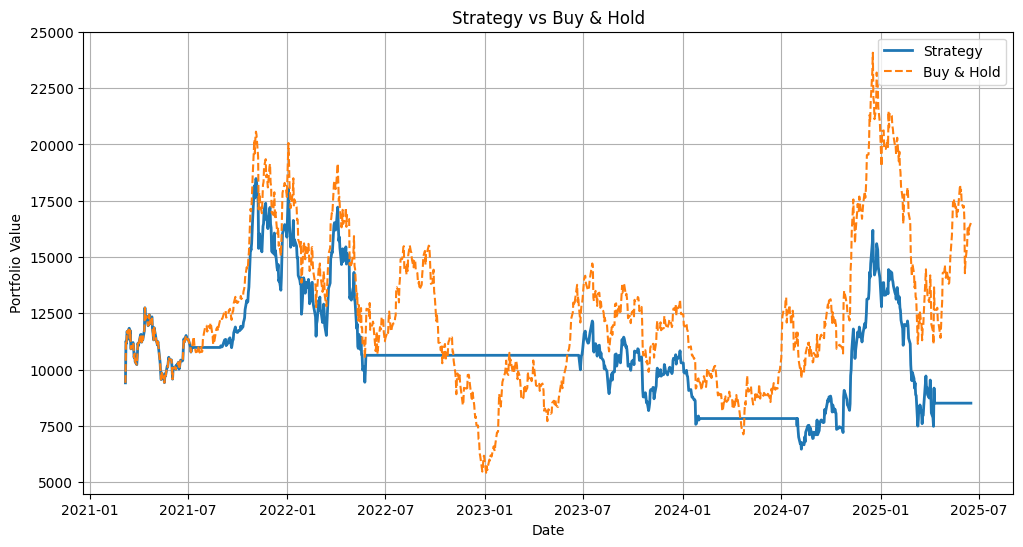


Running backtest for VTI



<ipython-input-3-4280806903>:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


Backtest Results:
Strategy Total Return: $4,242.04
Buy & Hold Return: $5,710.83


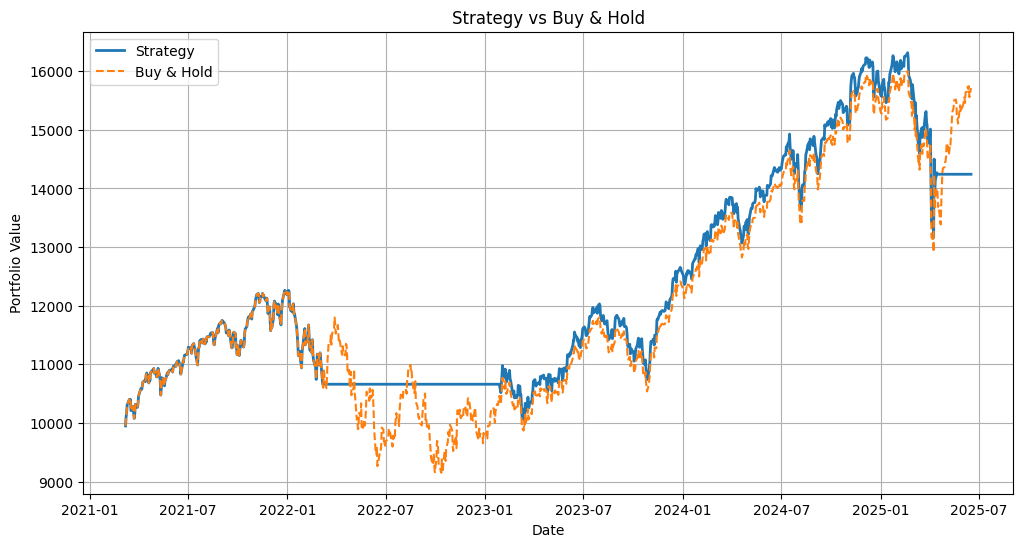

<ipython-input-3-4280806903>:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))



Running backtest for NVDA



[*********************100%***********************]  1 of 1 completed



Backtest Results:
Strategy Total Return: $96,260.69
Buy & Hold Return: $106,423.09


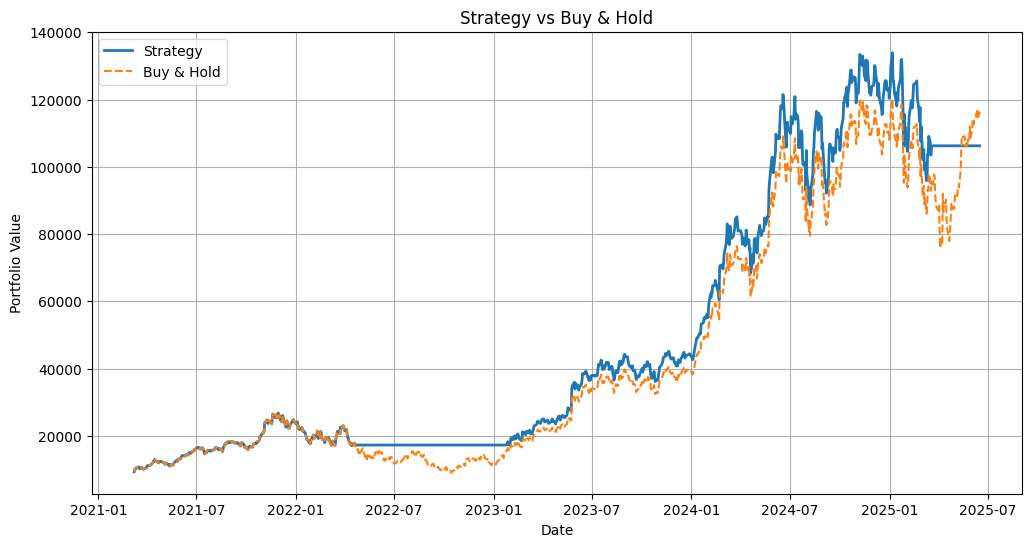

<ipython-input-3-4280806903>:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


Running backtest for GOOG


Backtest Results:
Strategy Total Return: $7,392.14
Buy & Hold Return: $6,978.35


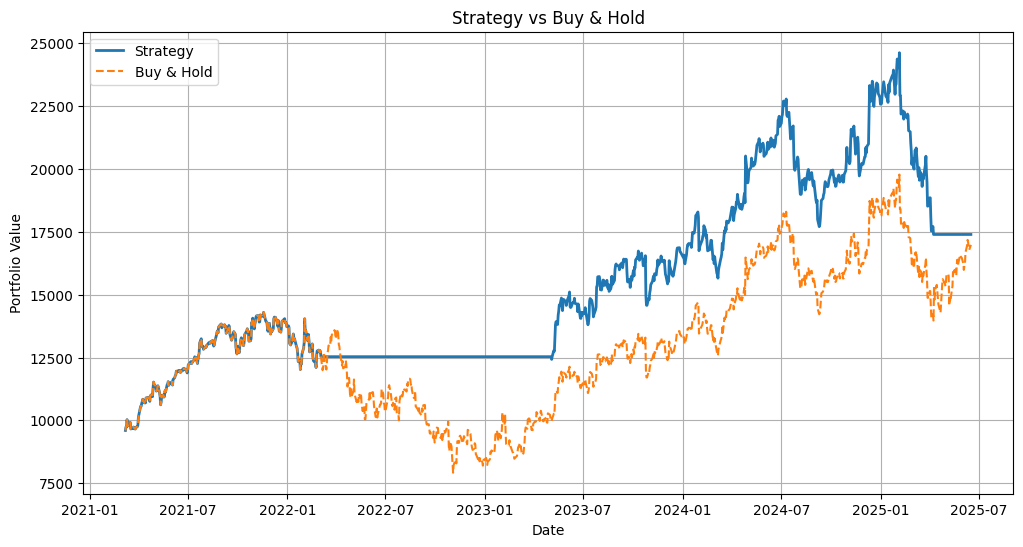


Running backtest for AAPL



<ipython-input-3-4280806903>:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Backtest Results:
Strategy Total Return: $496.00
Buy & Hold Return: $6,727.02


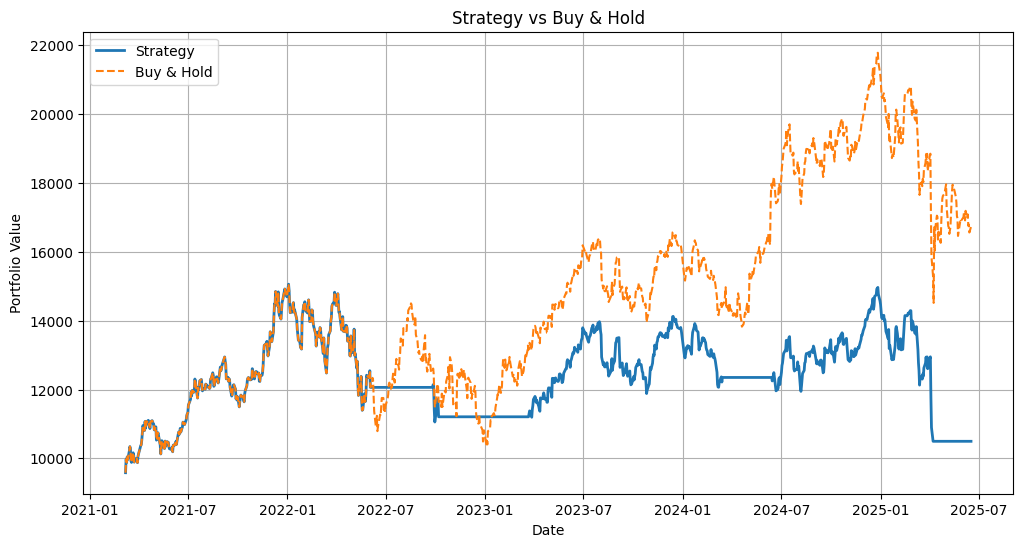


Running backtest for QBIG



<ipython-input-3-4280806903>:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed

Not enough data after generating signals.

Running backtest for VB




<ipython-input-3-4280806903>:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Backtest Results:
Strategy Total Return: $-1,902.80
Buy & Hold Return: $1,785.63


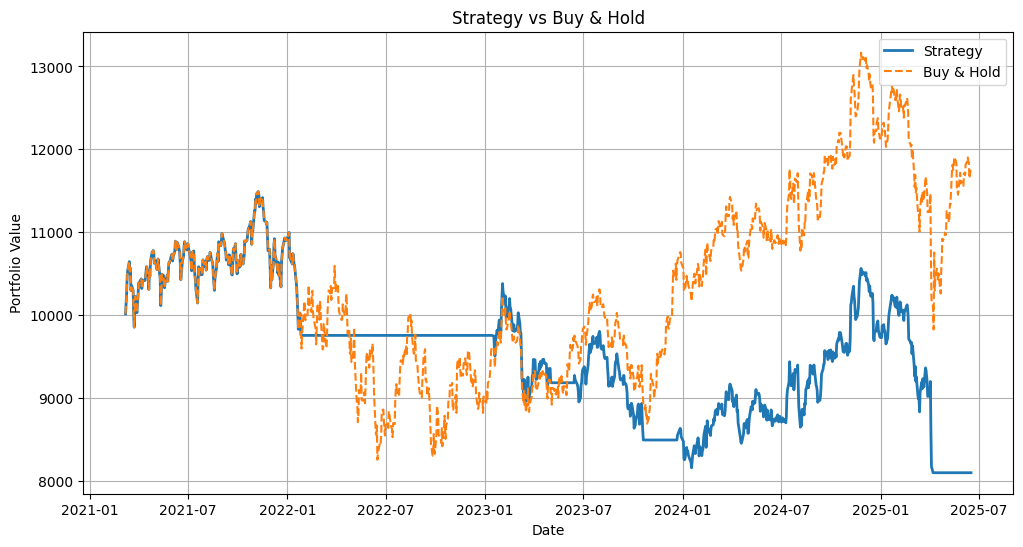


Running backtest for META



<ipython-input-3-4280806903>:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Backtest Results:
Strategy Total Return: $32,185.17
Buy & Hold Return: $16,713.02


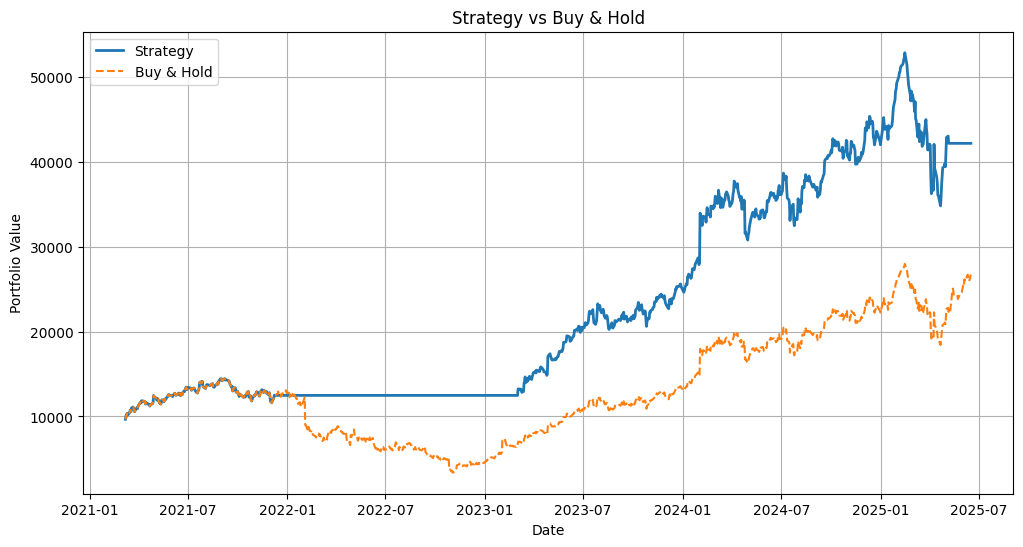


Running backtest for MSFT



<ipython-input-3-4280806903>:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Backtest Results:
Strategy Total Return: $8,272.50
Buy & Hold Return: $11,435.63


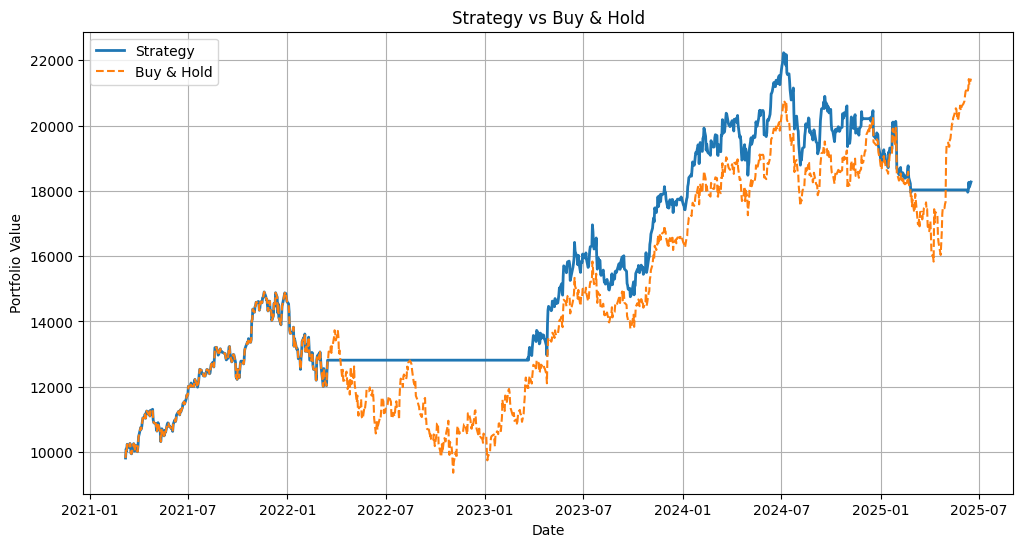


Running backtest for GS


<ipython-input-3-4280806903>:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Backtest Results:
Strategy Total Return: $4,689.04
Buy & Hold Return: $11,292.92


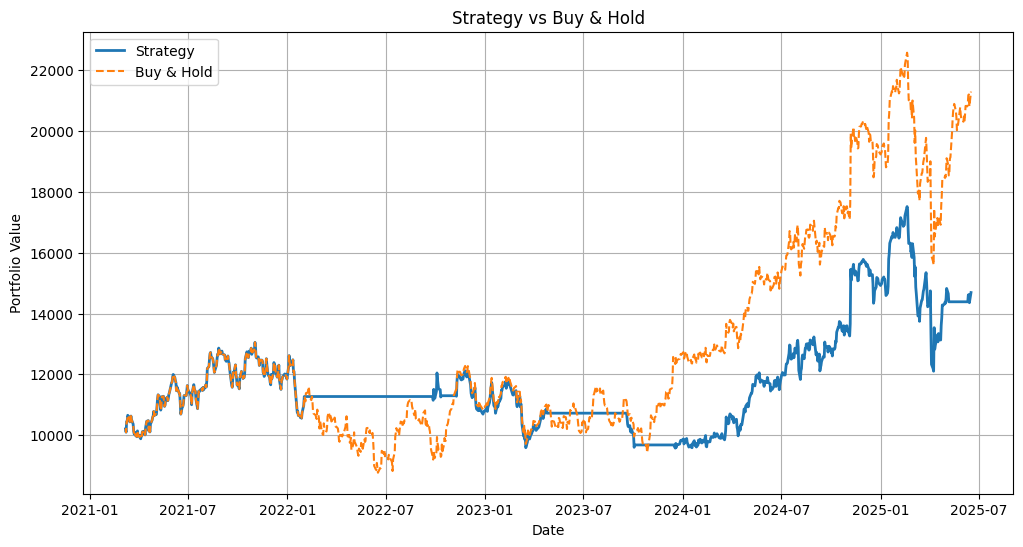

<ipython-input-3-4280806903>:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


Running backtest for BLK




Backtest Results:
Strategy Total Return: $1,404.25
Buy & Hold Return: $5,524.19


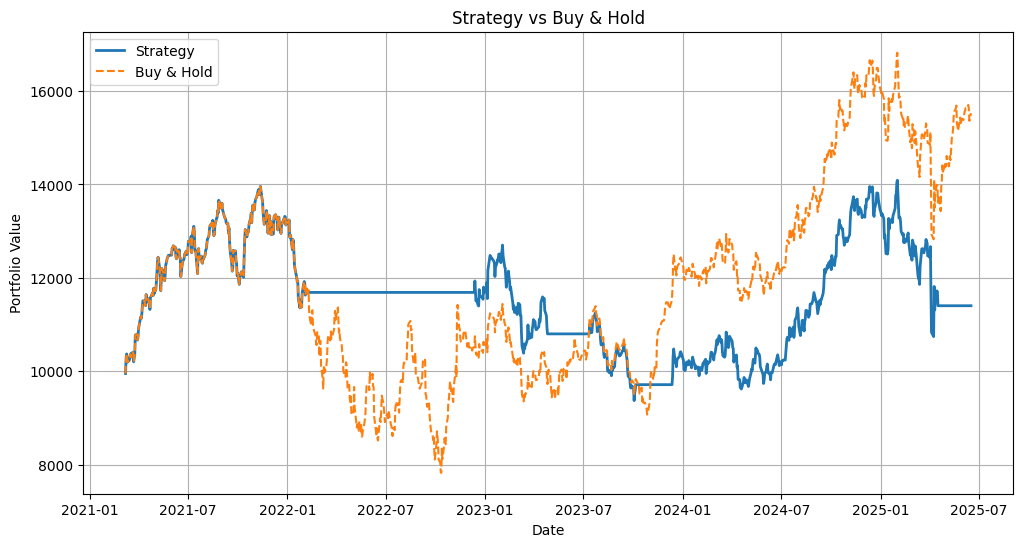


Running backtest for JPM



<ipython-input-3-4280806903>:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Backtest Results:
Strategy Total Return: $11,874.79
Buy & Hold Return: $10,057.85


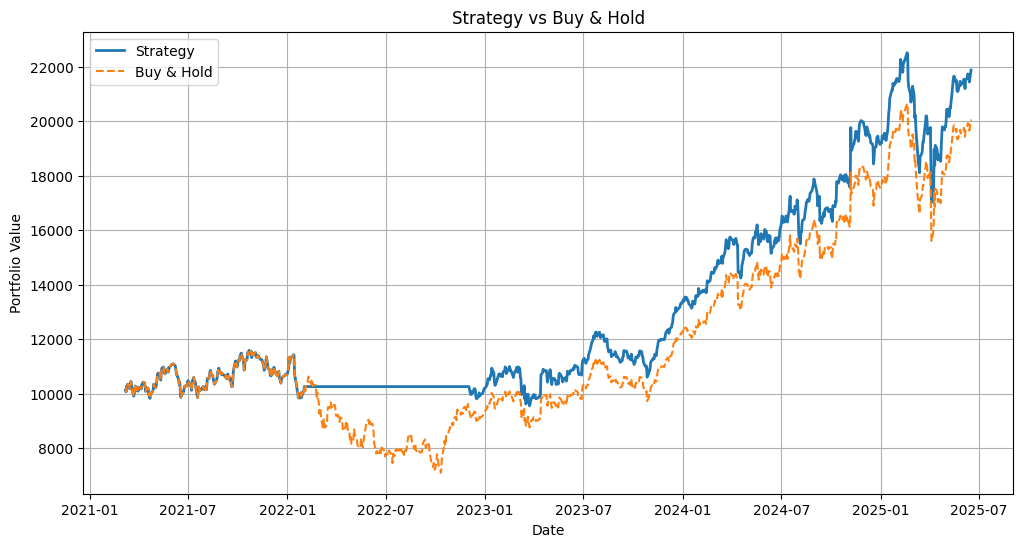

In [4]:
# === INPUT YOUR STOCK TICKERS HERE ===
tickers = ['QQQ', 'VOO', 'DIA', 'BRK-B', 'TQQQ', 'AMZN', 'TSLA', 'VTI', 'NVDA', 'GOOG', 'AAPL', 'QBIG', 'VB', 'META', 'MSFT', 'GS', 'BLK', 'JPM']  # ← Add or remove tickers here

for ticker in tickers:
    run_quant_model(ticker)

In [5]:
# Adding more parameters

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# ----------------------------------------
# STEP 1: Download historical price data
# ----------------------------------------

def get_data(ticker):
    end = datetime.today()
    start = end - timedelta(days=5*365 + 30)  # approx. 5 years
    df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
    return df

# ----------------------------------------
# STEP 2: Generate 50-day and 200-day SMAs + trading signals
# ----------------------------------------

def generate_signals(df):
    # Simple Moving Averages
    # SMA_t = (P_t + P_{t-1} + ... + P_{t-N+1}) / N
    df['SMA_50'] = df['Close'].rolling(window=50).mean()
    df['SMA_200'] = df['Close'].rolling(window=200).mean()

    df.dropna(inplace=True)

    # Trading signal: 1 if SMA_50 > SMA_200 (bullish), 0 otherwise (bearish/neutral)
    df['Signal'] = 0
    df.loc[df['SMA_50'] > df['SMA_200'], 'Signal'] = 1

    # We enter position based on yesterday’s signal
    df['Position'] = df['Signal'].shift(1).fillna(0)

    return df

# ----------------------------------------
# STEP 3: Backtest the strategy and report performance
# ----------------------------------------

def performance_report(df, initial_capital=10000, trading_cost=0.001):
    # Daily returns: R_t = (P_t / P_{t-1}) - 1
    df['Daily Return'] = df['Close'].pct_change().fillna(0)

    # Strategy return: R_strat = Signal_{t-1} * R_t
    # You only get return if you were in position the previous day
    df['Strategy Return'] = df['Position'] * df['Daily Return']

    # --- Slippage + Transaction Cost ---
    # Assumes 0.1% cost per trade (i.e. when position changes)
    df['Trade'] = df['Position'].diff().fillna(0).abs()
    df['Strategy Return Net'] = df['Strategy Return'] - df['Trade'] * trading_cost

    # --- Portfolio Value Over Time ---
    # Cumulative product simulates compound growth over time
    df['Portfolio Value'] = (1 + df['Strategy Return Net']).cumprod() * initial_capital
    df['Buy & Hold'] = (1 + df['Daily Return']).cumprod() * initial_capital

    # -------- PERFORMANCE METRICS --------

    # Total Return: (V_final / V_start) - 1
    total_return = df['Portfolio Value'].iloc[-1] / initial_capital - 1
    bh_return = df['Buy & Hold'].iloc[-1] / initial_capital - 1

    # CAGR (Compound Annual Growth Rate)
    # CAGR = (Final Value / Initial)^(1 / T_years) - 1
    trading_days = 252
    years = len(df) / trading_days
    cagr = (df['Portfolio Value'].iloc[-1] / initial_capital) ** (1 / years) - 1

    # Annualized Volatility
    # std(R) * sqrt(252)
    volatility = df['Strategy Return Net'].std() * np.sqrt(trading_days)

    # Sharpe Ratio: (mean(R) - R_f) / std(R)
    # Assuming R_f = 0 (no risk-free return for simplicity)
    sharpe = (df['Strategy Return Net'].mean() / df['Strategy Return Net'].std()) * np.sqrt(trading_days)

    # Max Drawdown = min(Portfolio / Running_Max - 1)
    cum_returns = (1 + df['Strategy Return Net']).cumprod()
    roll_max = cum_returns.cummax()
    drawdown = (cum_returns - roll_max) / roll_max
    max_dd = drawdown.min()

    # ----------- PRINT REPORT -----------
    print(f"==== Performance Report ====\n")
    print(f"Total Return (Strategy):                               {total_return*100:.2f}%")
    print(f"Total Return (Buy & Hold):                             {bh_return*100:.2f}%")
    print(f"CAGR (Compound Annual Growth Rate):                    {cagr*100:.2f}%")
    print(f"Annualized Volatility (std(R)*sqrt(trading_days=252)): {volatility*100:.2f}%")
    print(f"Sharpe Ratio (mean(R)-R_f / std(R)):                   {sharpe:.2f}")
    print(f"Max Drawdown (min(Portfolio / Running_Max - 1)):       {max_dd*100:.2f}%")

    # ----------- PLOT -----------
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df['Portfolio Value'], label='SMA Crossover Strategy', linewidth=2)
    plt.plot(df.index, df['Buy & Hold'], label='Buy & Hold', linestyle='--')
    plt.title("Strategy vs Buy & Hold: Portfolio Growth")
    plt.xlabel("Date")
    plt.ylabel("Portfolio Value ($)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# ----------------------------------------
# STEP 4: Wrap all in one function
# ----------------------------------------

def run_quant_pipeline(ticker):
    print(f"\n\nAnalyzing {ticker}...\n")
    df = get_data(ticker)
    if df.empty:
        print("No data found.")
        return
    df = generate_signals(df)
    if df.empty:
        print("Not enough data after generating signals.")
        return
    performance_report(df)

<ipython-input-5-2519254297>:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing QQQ...

==== Performance Report ====

Total Return (Strategy):                               83.78%
Total Return (Buy & Hold):                             80.40%
CAGR (Compound Annual Growth Rate):                    15.30%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 17.38%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.91
Max Drawdown (min(Portfolio / Running_Max - 1)):       -22.77%


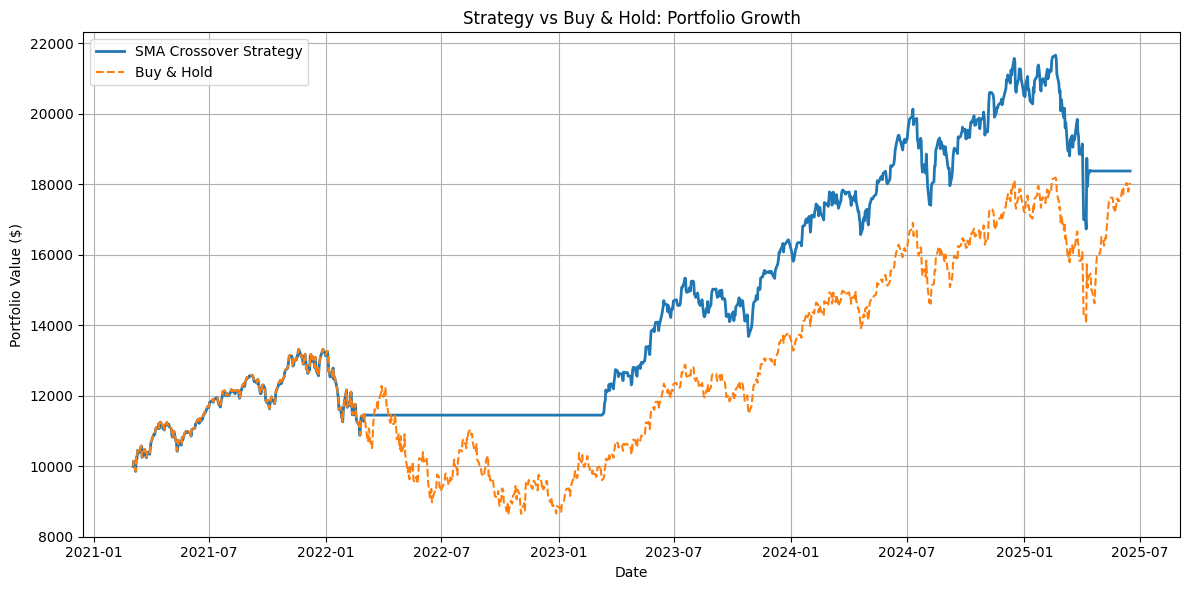

<ipython-input-5-2519254297>:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing VOO...

==== Performance Report ====

Total Return (Strategy):                               56.79%
Total Return (Buy & Hold):                             70.37%
CAGR (Compound Annual Growth Rate):                    11.10%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 13.35%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.86
Max Drawdown (min(Portfolio / Running_Max - 1)):       -18.69%


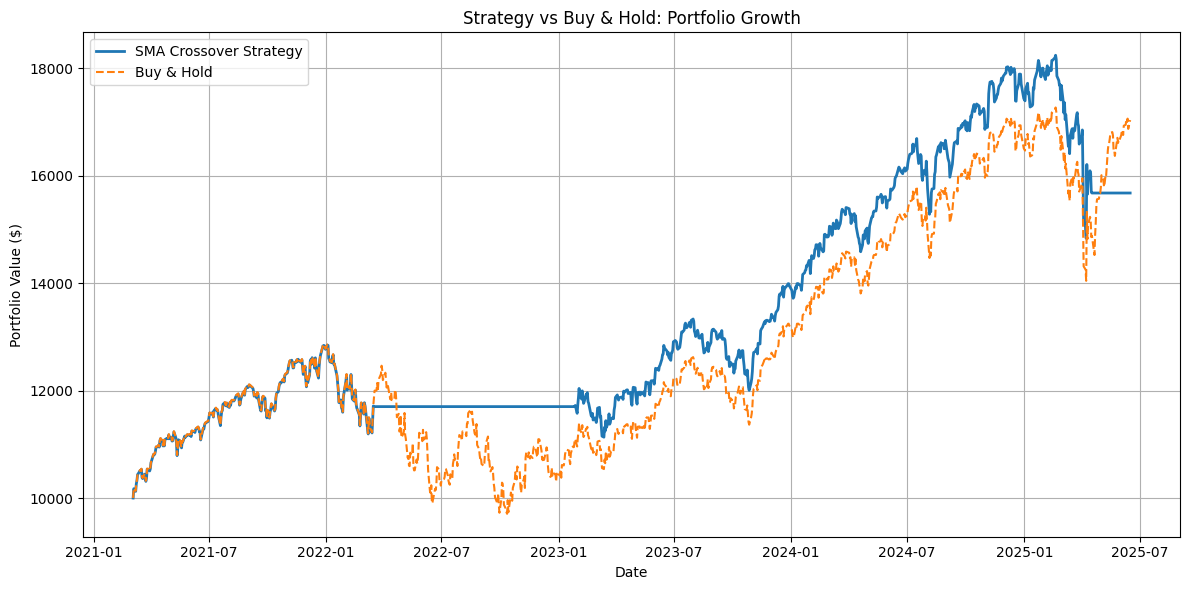

<ipython-input-5-2519254297>:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing DIA...

==== Performance Report ====

Total Return (Strategy):                               29.31%
Total Return (Buy & Hold):                             48.07%
CAGR (Compound Annual Growth Rate):                    6.20%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 12.13%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.56
Max Drawdown (min(Portfolio / Running_Max - 1)):       -15.95%


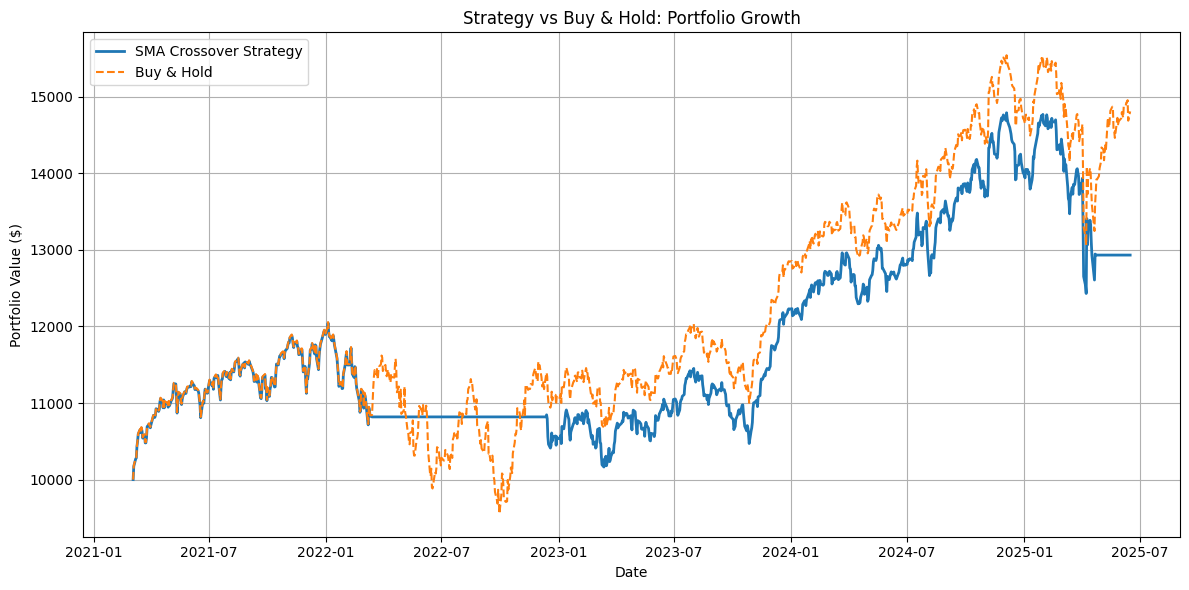

<ipython-input-5-2519254297>:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing BRK-B...

==== Performance Report ====

Total Return (Strategy):                               79.16%
Total Return (Buy & Hold):                             99.70%
CAGR (Compound Annual Growth Rate):                    14.62%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 15.79%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.94
Max Drawdown (min(Portfolio / Running_Max - 1)):       -26.70%


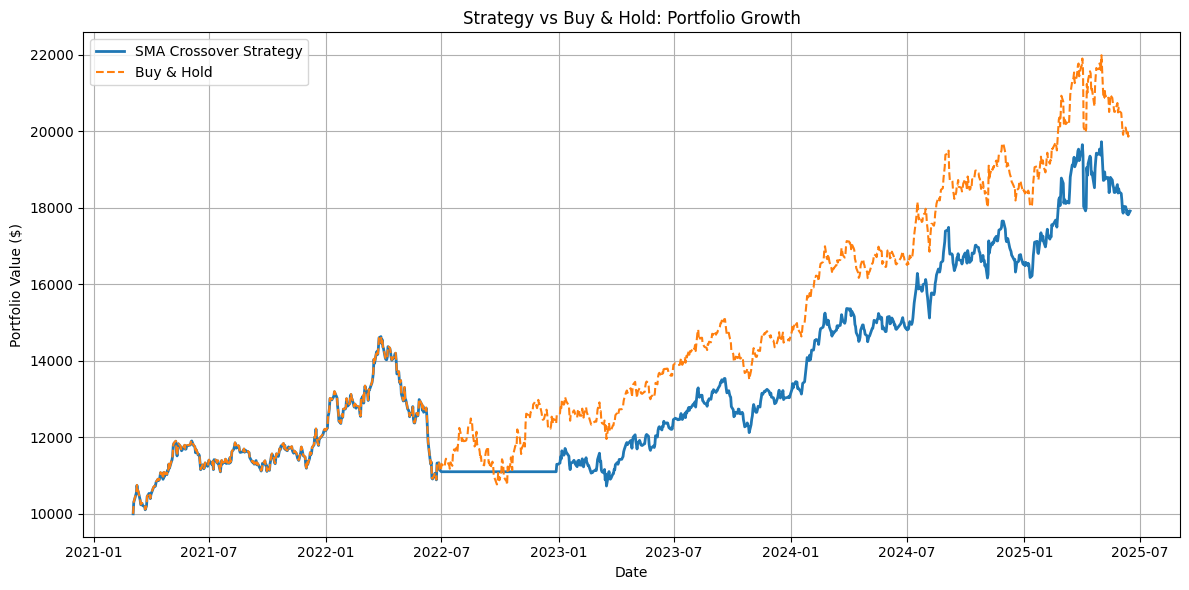

<ipython-input-5-2519254297>:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing TQQQ...

==== Performance Report ====

Total Return (Strategy):                               136.89%
Total Return (Buy & Hold):                             96.61%
CAGR (Compound Annual Growth Rate):                    22.36%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 46.62%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.67
Max Drawdown (min(Portfolio / Running_Max - 1)):       -49.03%


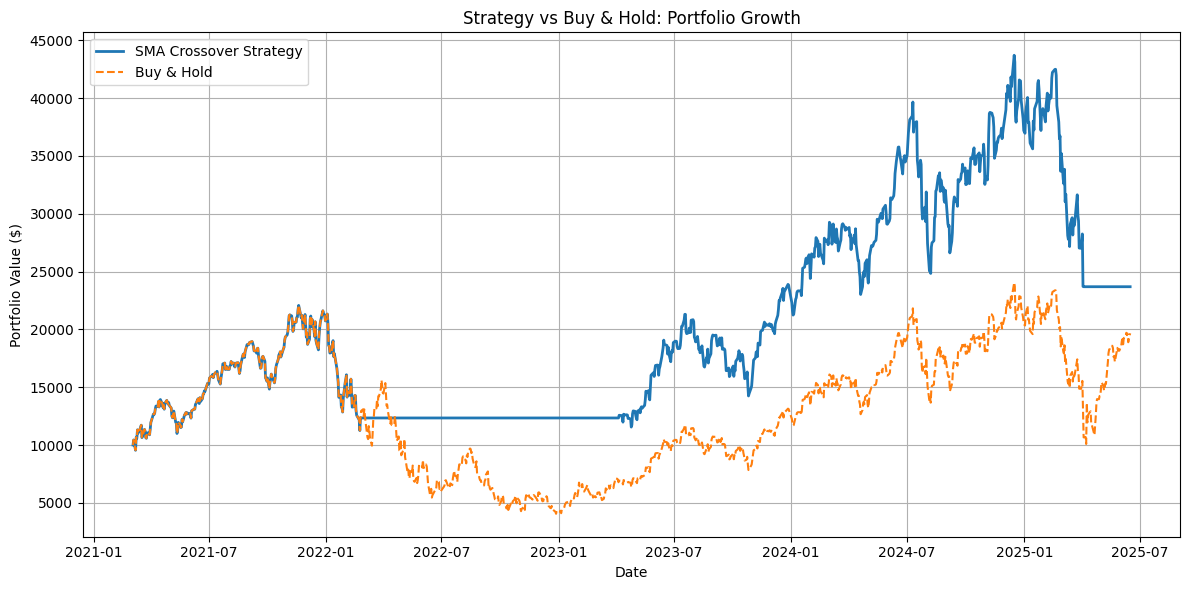

<ipython-input-5-2519254297>:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing AMZN...

==== Performance Report ====

Total Return (Strategy):                               30.91%
Total Return (Buy & Hold):                             45.15%
CAGR (Compound Annual Growth Rate):                    6.50%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 23.60%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.38
Max Drawdown (min(Portfolio / Running_Max - 1)):       -30.88%


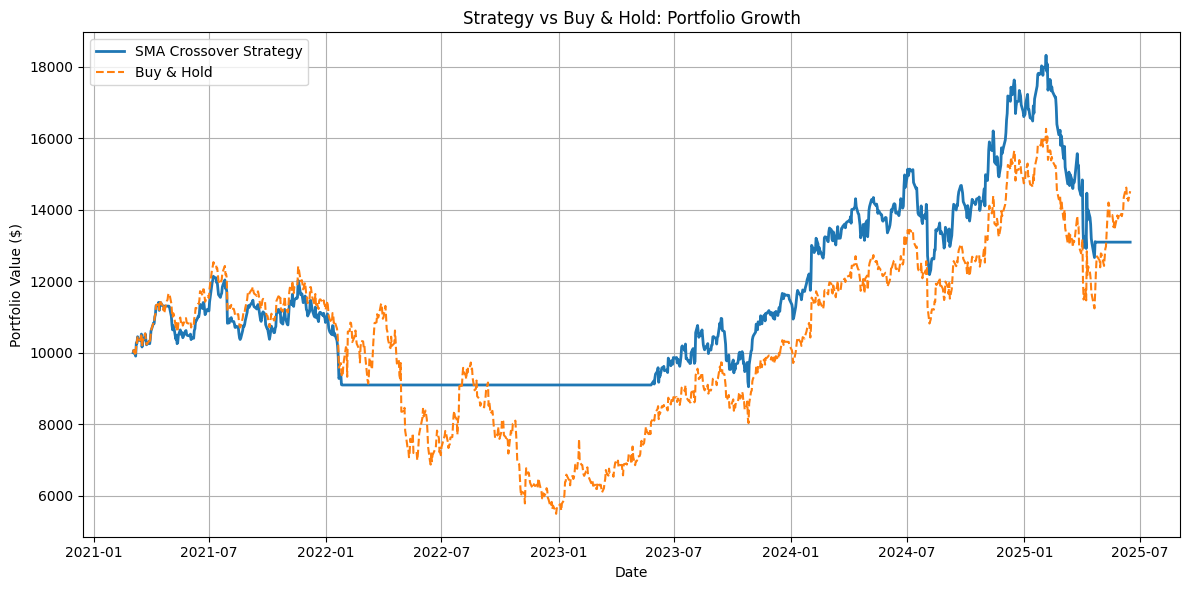

<ipython-input-5-2519254297>:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing TSLA...

==== Performance Report ====

Total Return (Strategy):                               -18.75%
Total Return (Buy & Hold):                             58.89%
CAGR (Compound Annual Growth Rate):                    -4.74%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 47.98%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.14
Max Drawdown (min(Portfolio / Running_Max - 1)):       -65.15%


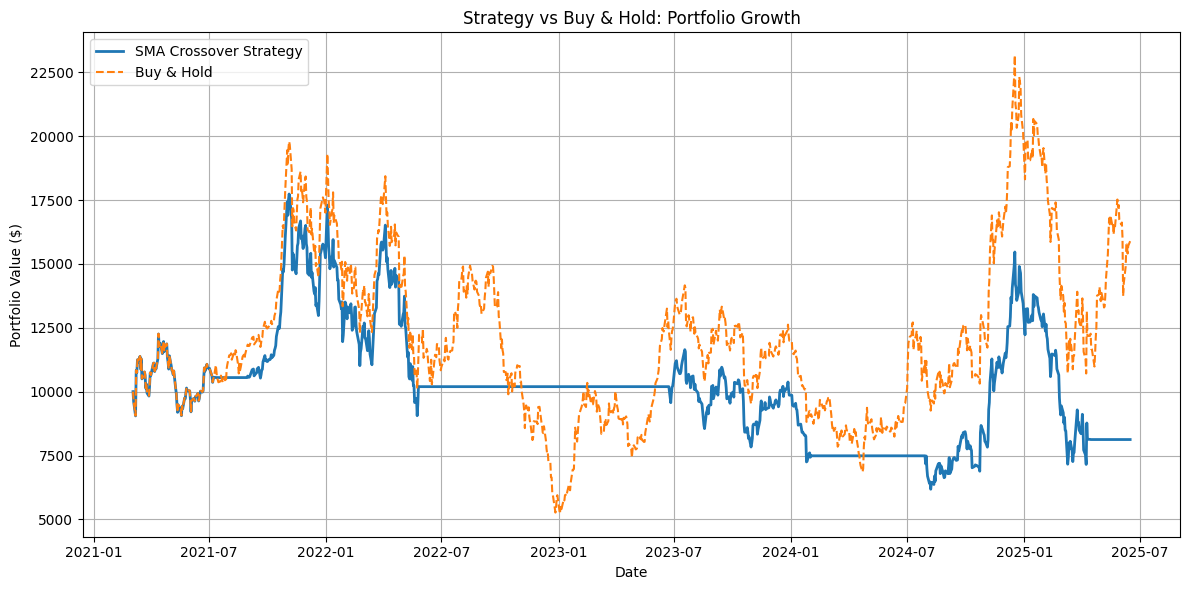

<ipython-input-5-2519254297>:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing VTI...

==== Performance Report ====

Total Return (Strategy):                               44.41%
Total Return (Buy & Hold):                             59.94%
CAGR (Compound Annual Growth Rate):                    8.98%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 13.75%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.69
Max Drawdown (min(Portfolio / Running_Max - 1)):       -19.30%


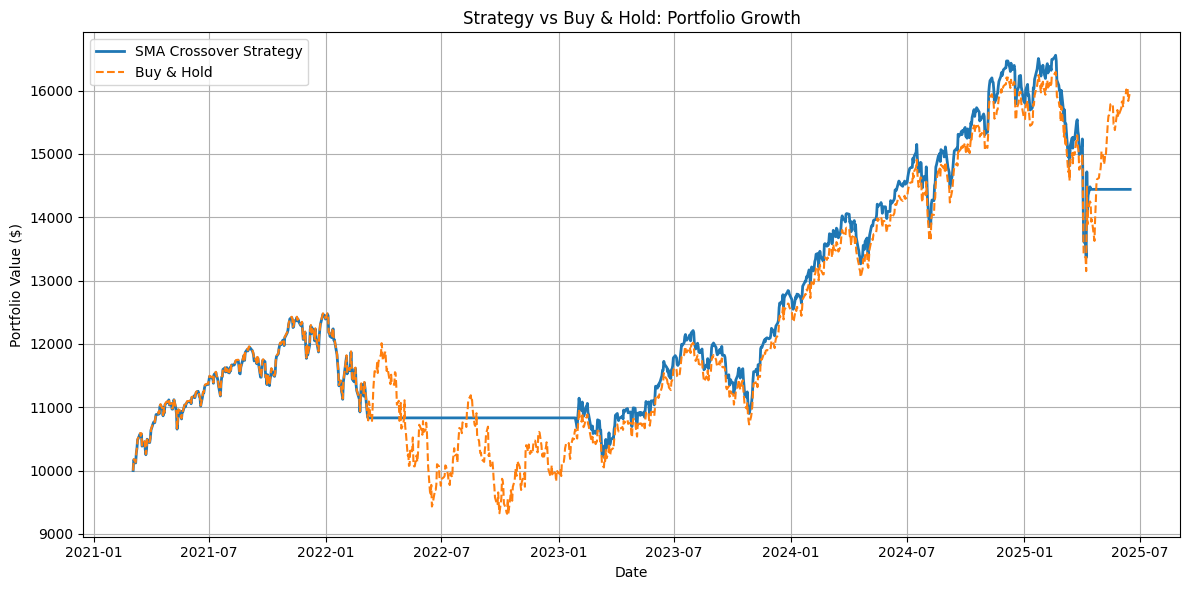

<ipython-input-5-2519254297>:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing NVDA...

==== Performance Report ====

Total Return (Strategy):                               966.18%
Total Return (Buy & Hold):                             1072.82%
CAGR (Compound Annual Growth Rate):                    73.98%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 45.35%
Sharpe Ratio (mean(R)-R_f / std(R)):                   1.45
Max Drawdown (min(Portfolio / Running_Max - 1)):       -36.29%


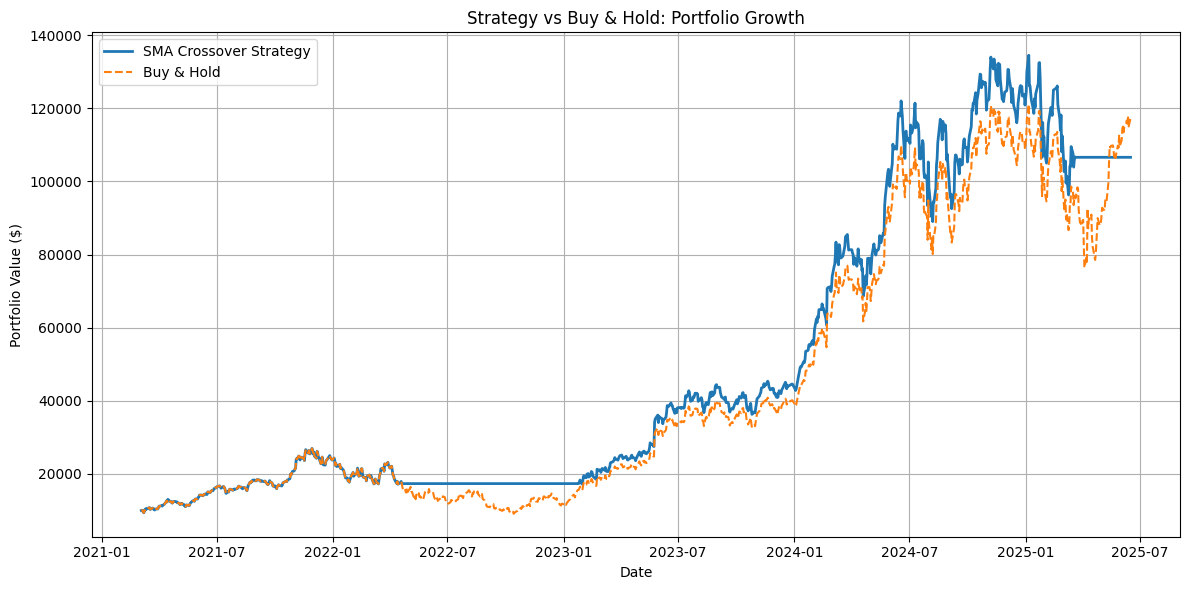

<ipython-input-5-2519254297>:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing GOOG...

==== Performance Report ====

Total Return (Strategy):                               78.26%
Total Return (Buy & Hold):                             74.71%
CAGR (Compound Annual Growth Rate):                    14.48%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 22.37%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.72
Max Drawdown (min(Portfolio / Running_Max - 1)):       -29.42%


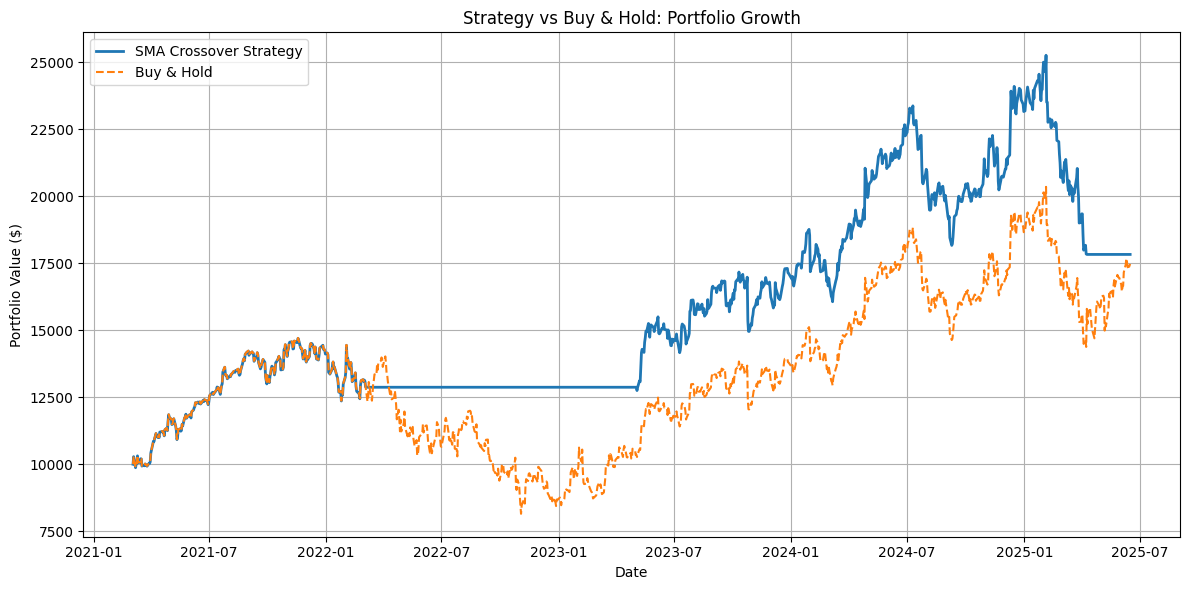

<ipython-input-5-2519254297>:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing AAPL...

==== Performance Report ====

Total Return (Strategy):                               5.24%
Total Return (Buy & Hold):                             69.07%
CAGR (Compound Annual Growth Rate):                    1.20%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 21.51%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.16
Max Drawdown (min(Portfolio / Running_Max - 1)):       -30.79%


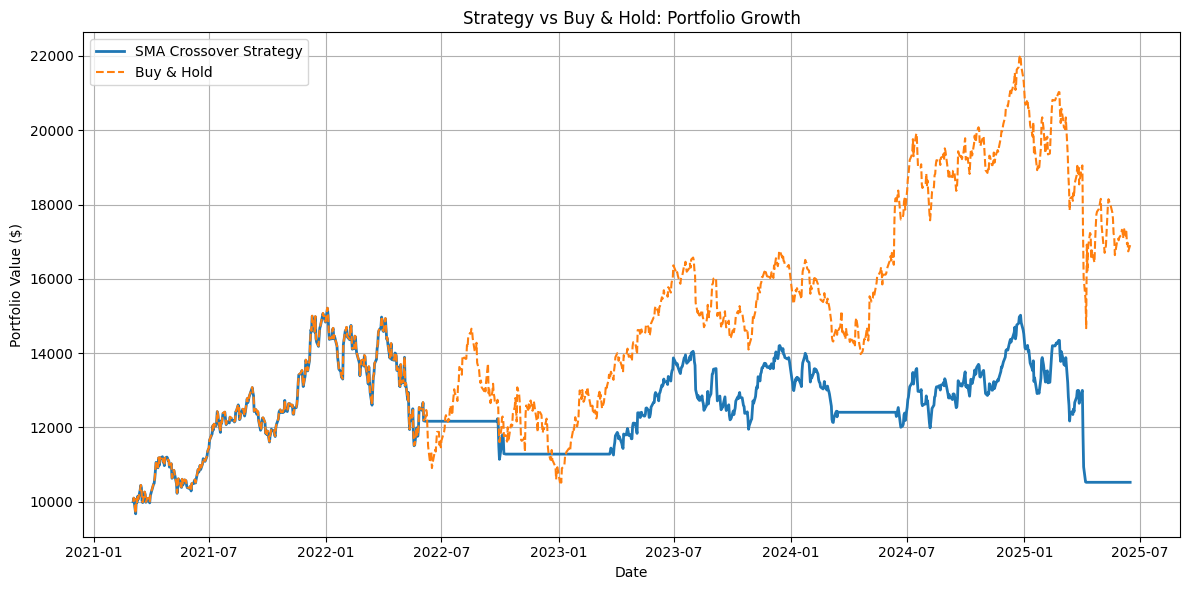

<ipython-input-5-2519254297>:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed
<ipython-input-5-2519254297>:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing QBIG...

Not enough data after generating signals.


Analyzing VB...

==== Performance Report ====

Total Return (Strategy):                               -18.18%
Total Return (Buy & Hold):                             20.05%
CAGR (Compound Annual Growth Rate):                    -4.59%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 14.87%
Sharpe Ratio (mean(R)-R_f / std(R)):                   -0.24
Max Drawdown (min(Portfolio / Running_Max - 1)):       -30.02%


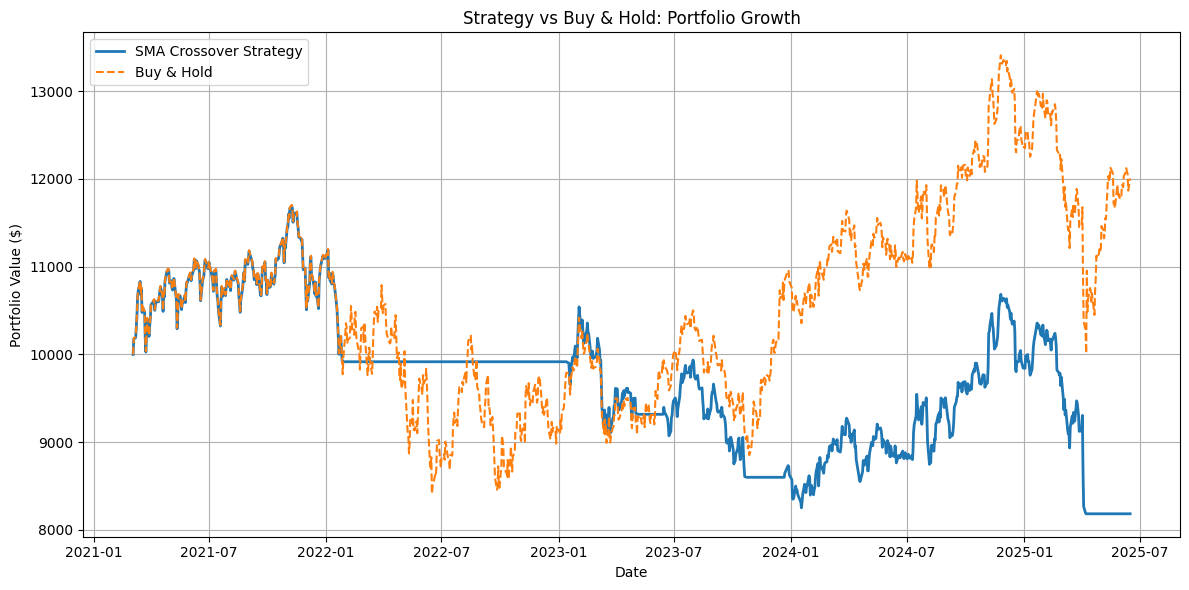

<ipython-input-5-2519254297>:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing META...

==== Performance Report ====

Total Return (Strategy):                               331.03%
Total Return (Buy & Hold):                             174.01%
CAGR (Compound Annual Growth Rate):                    40.76%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 29.20%
Sharpe Ratio (mean(R)-R_f / std(R)):                   1.31
Max Drawdown (min(Portfolio / Running_Max - 1)):       -34.15%


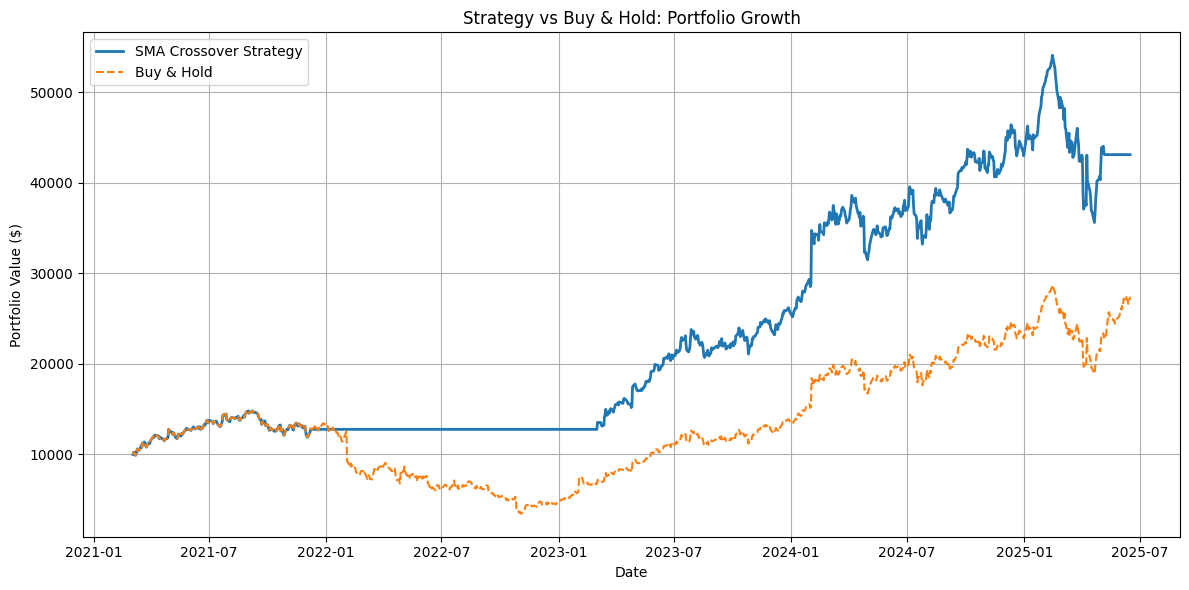

<ipython-input-5-2519254297>:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing MSFT...

==== Performance Report ====

Total Return (Strategy):                               85.35%
Total Return (Buy & Hold):                             118.96%
CAGR (Compound Annual Growth Rate):                    15.53%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 18.66%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.87
Max Drawdown (min(Portfolio / Running_Max - 1)):       -19.54%


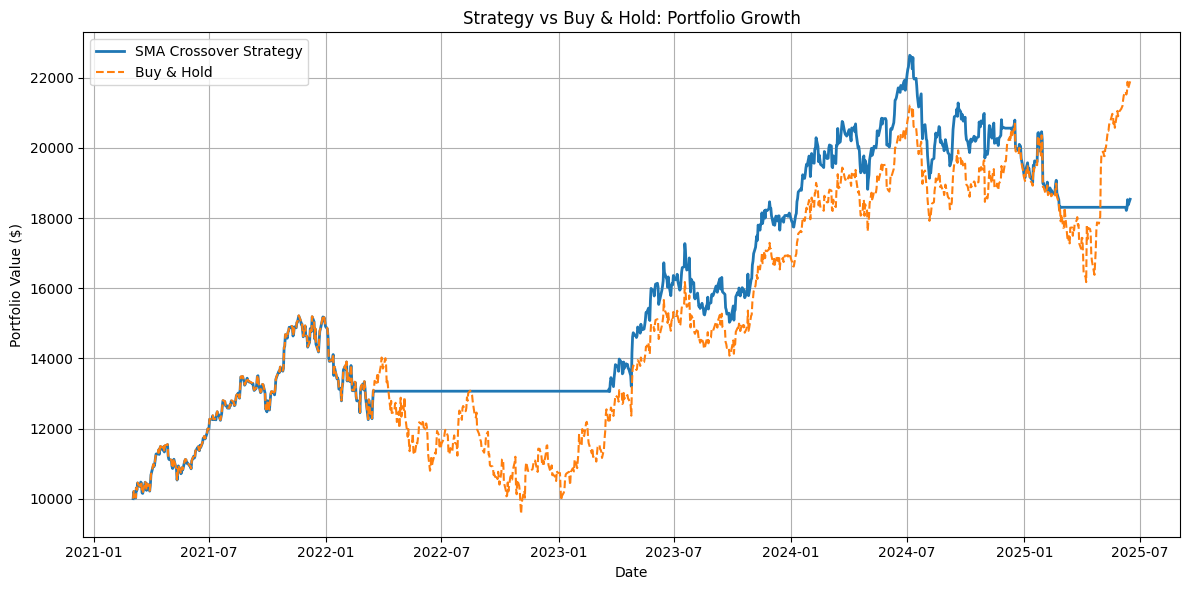

<ipython-input-5-2519254297>:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing GS...

==== Performance Report ====

Total Return (Strategy):                               44.43%
Total Return (Buy & Hold):                             111.69%
CAGR (Compound Annual Growth Rate):                    8.98%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 23.05%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.49
Max Drawdown (min(Portfolio / Running_Max - 1)):       -30.90%


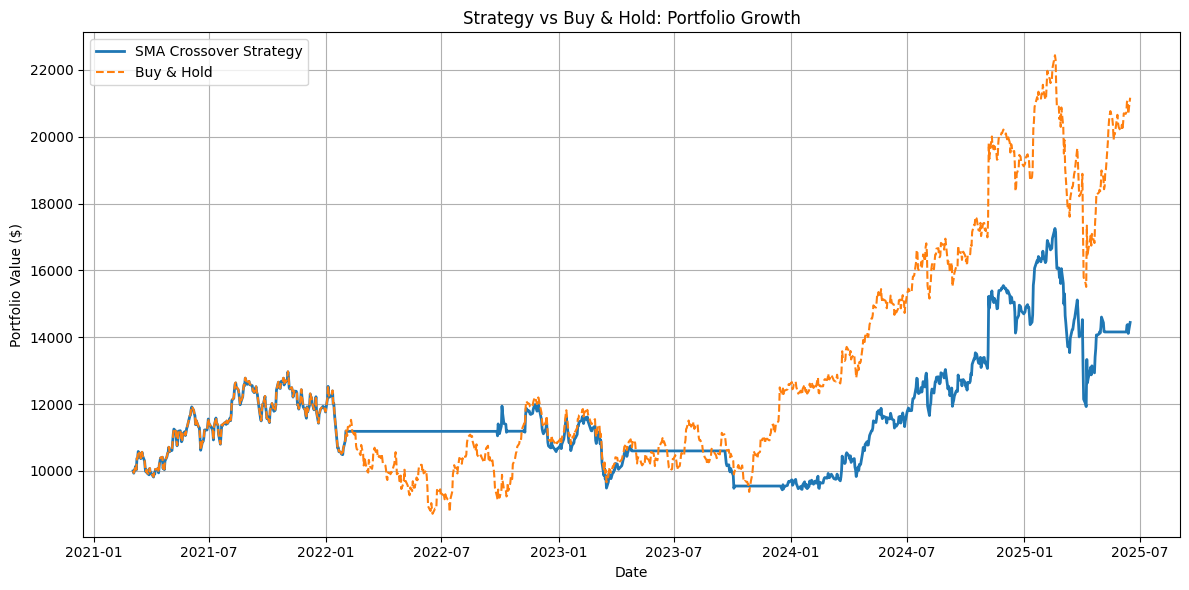

<ipython-input-5-2519254297>:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing BLK...

==== Performance Report ====

Total Return (Strategy):                               16.30%
Total Return (Buy & Hold):                             59.58%
CAGR (Compound Annual Growth Rate):                    3.60%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 18.78%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.28
Max Drawdown (min(Portfolio / Running_Max - 1)):       -33.11%


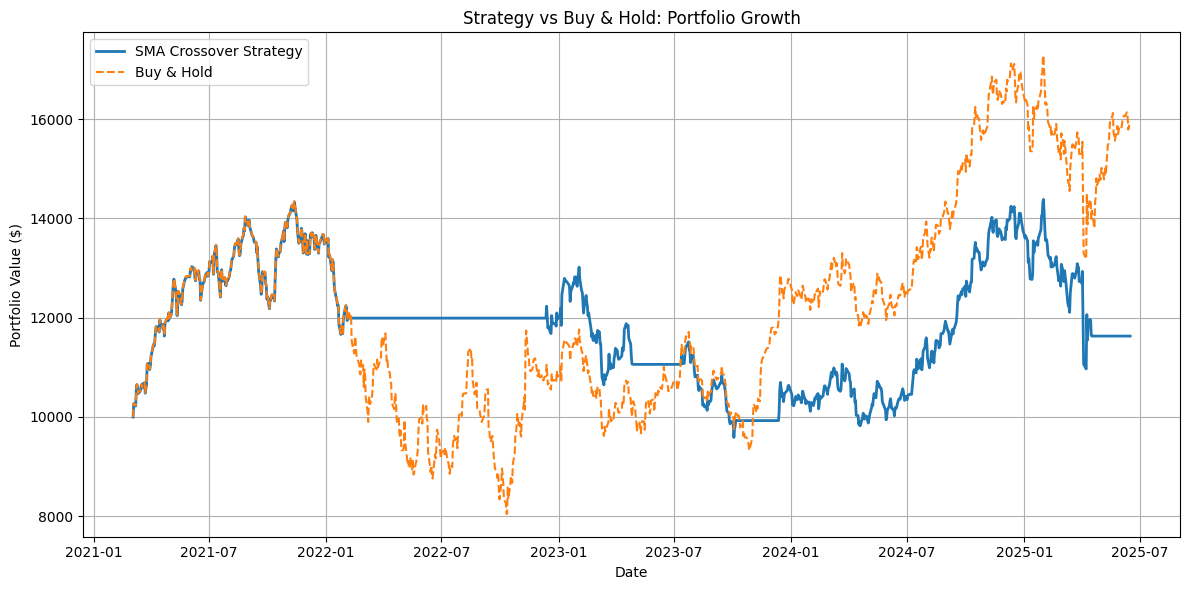

<ipython-input-5-2519254297>:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start.strftime('%Y-%m-%d'), end=end.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed



Analyzing JPM...

==== Performance Report ====

Total Return (Strategy):                               118.59%
Total Return (Buy & Hold):                             101.04%
CAGR (Compound Annual Growth Rate):                    20.08%
Annualized Volatility (std(R)*sqrt(trading_days=252)): 20.79%
Sharpe Ratio (mean(R)-R_f / std(R)):                   0.98
Max Drawdown (min(Portfolio / Running_Max - 1)):       -24.42%


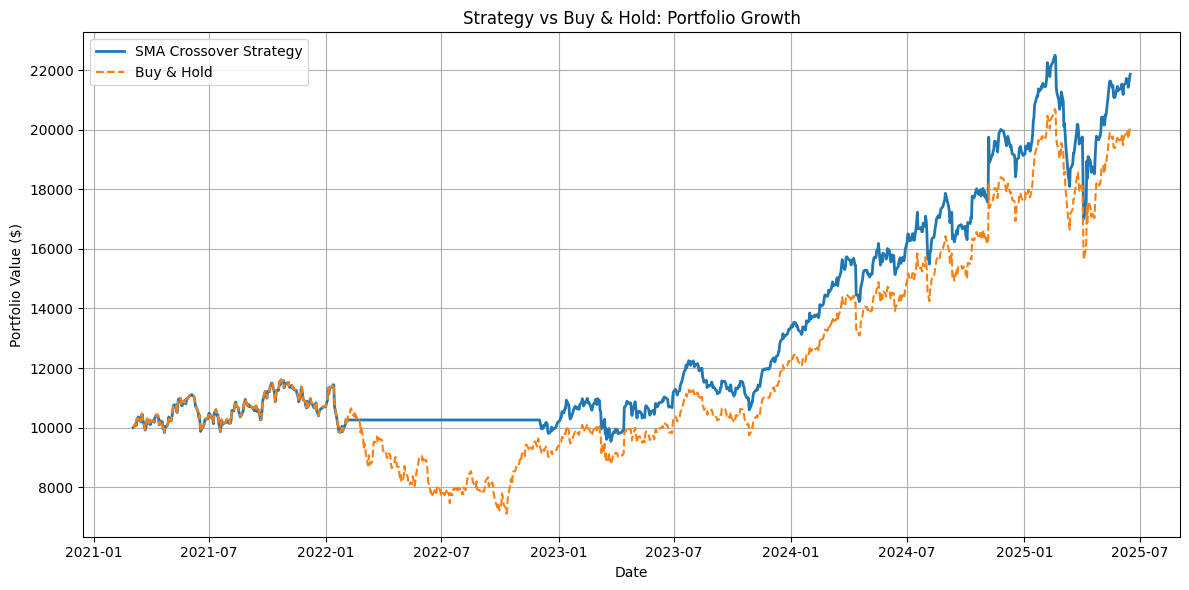

In [6]:
# === INPUT YOUR STOCK TICKERS HERE ===
tickers = ['QQQ', 'VOO', 'DIA', 'BRK-B', 'TQQQ', 'AMZN', 'TSLA', 'VTI', 'NVDA', 'GOOG', 'AAPL', 'QBIG', 'VB', 'META', 'MSFT', 'GS', 'BLK', 'JPM']  # ← Add or remove tickers here

for ticker in tickers:
    run_quant_pipeline(ticker)